
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

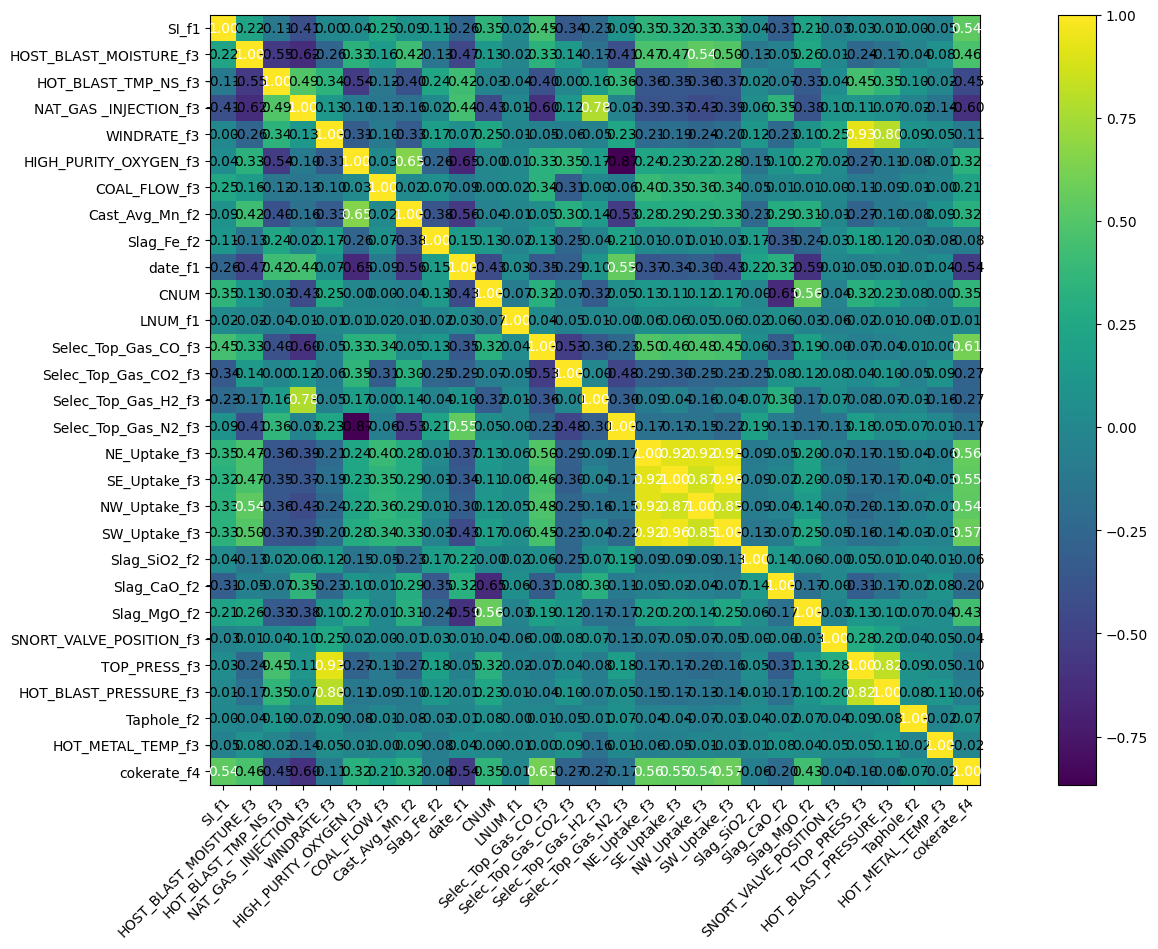

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

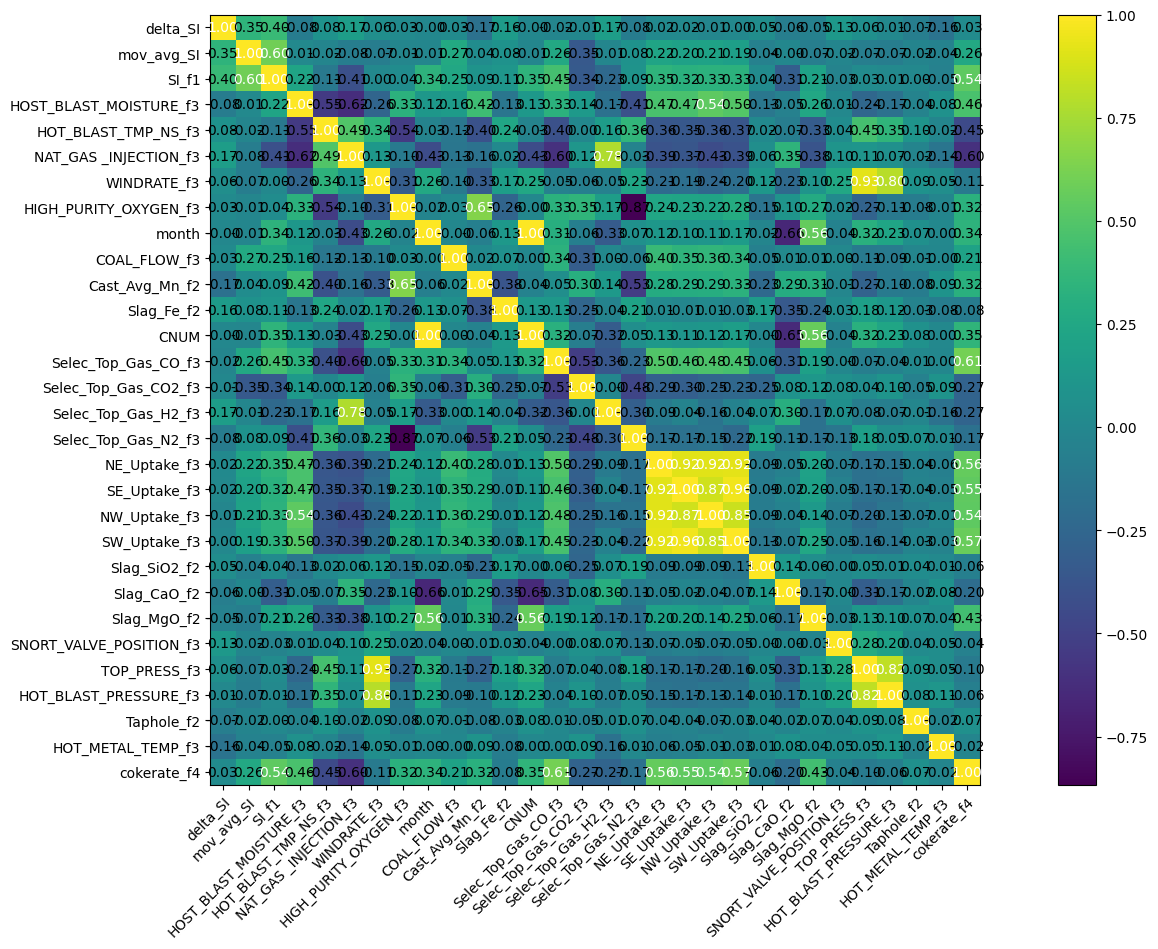

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        ## [B, 10, 35],  [B, 10, 1]
        ## idx_pred,     pred_si 
        
       
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## print(pred_si.shape)
        ## print(y_si.shape)
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 0.7
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.800603
Loss_SI: 0.5961503982543945 Loss_all: 1.2776591777801514
===
[200] Train Loss: 0.109068
Loss_SI: 0.06484053283929825 Loss_all: 0.21226482093334198
===
[400] Train Loss: 0.043923
Loss_SI: 0.023396680131554604 Loss_all: 0.09181898087263107
===
[600] Train Loss: 0.024959
Loss_SI: 0.013516131788492203 Loss_all: 0.05165867879986763
===
[800] Train Loss: 0.022761
Loss_SI: 0.014052228070795536 Loss_all: 0.04308312386274338
===


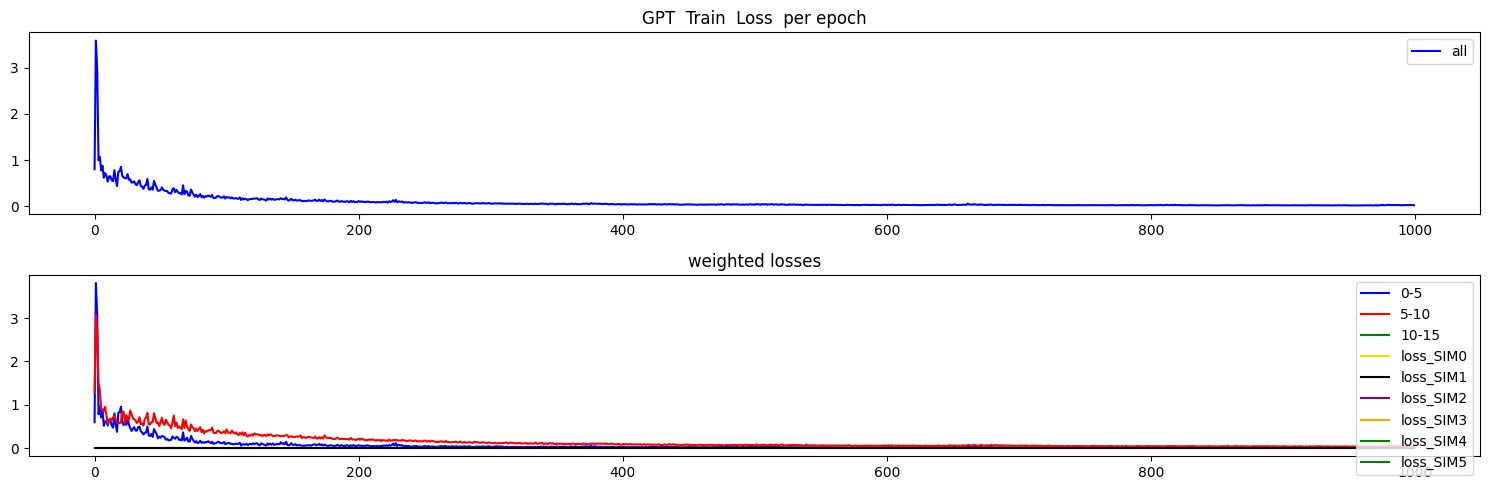

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


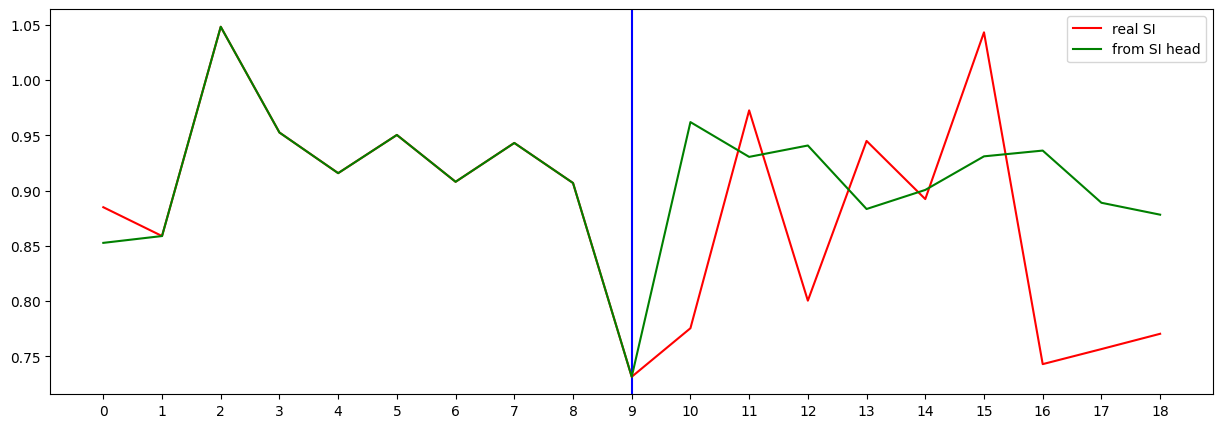

Testing R**2 - (all) - (no inputs):  0.9951956004870683
Testing R**2 - (f2) - SI full (no inputs):  -0.3863006880777389
Testing R**2 - SI head only (no inputs):  -0.3160285572071375
0 ...index R**2 (no inputs):  0.1389015439726613
1 ...index R**2 (no inputs):  -0.7760176144039534
2 ...index R**2 (no inputs):  -0.3863006880777389
3 ...index R**2 (no inputs):  -0.6119272890203342
4 ...index R**2 (no inputs):  -0.1343637445411452
5 ...index R**2 (no inputs):  -0.08155065680552909
6 ...index R**2 (no inputs):  -0.14586739653336678
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7743469104205625
10 ...index R**2 (no inputs):  -0.8601121709173833
11 ...index R**2 (no inputs):  -2.9687044302111585
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1930020039579523
16 ...index R**2 (no inputs):  0.20903098864969272
17 ...index R**2 (no inputs):  -6.605477

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.731813
Loss_SI: 0.529617965221405 Loss_all: 1.2035998106002808
===
[200] Train Loss: 0.184083
Loss_SI: 0.09857723116874695 Loss_all: 0.3835980296134949
===
[400] Train Loss: 0.107766
Loss_SI: 0.05596006661653519 Loss_all: 0.22864510118961334
===
[600] Train Loss: 0.056834
Loss_SI: 0.025211773812770844 Loss_all: 0.13061849772930145
===
[800] Train Loss: 0.057663
Loss_SI: 0.03277324140071869 Loss_all: 0.1157388910651207
===


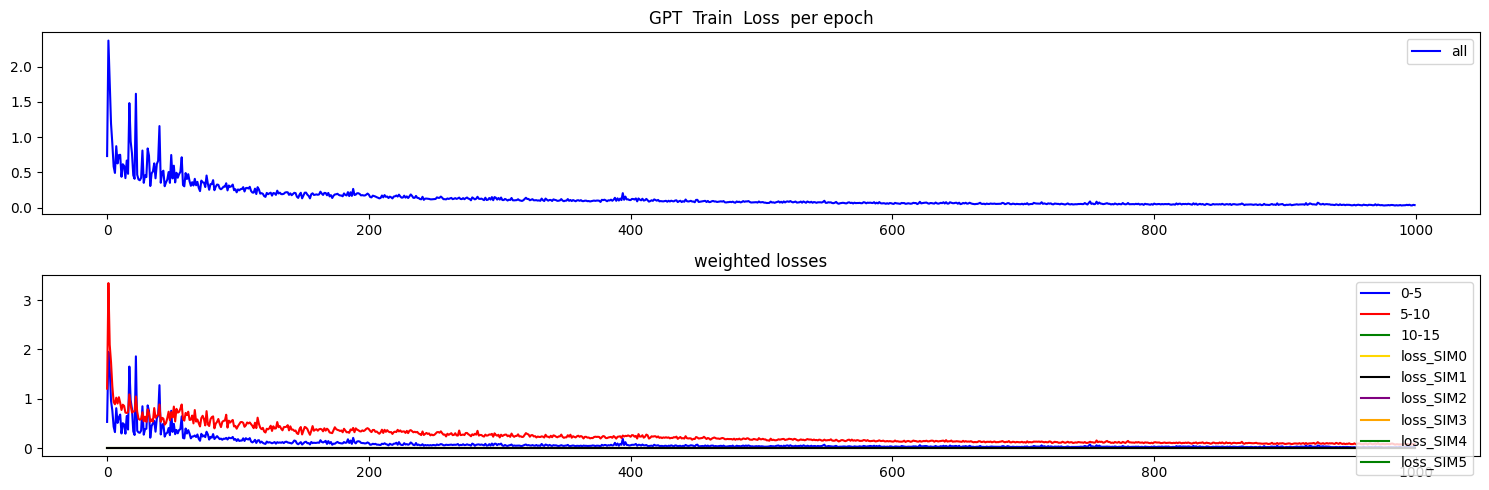

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


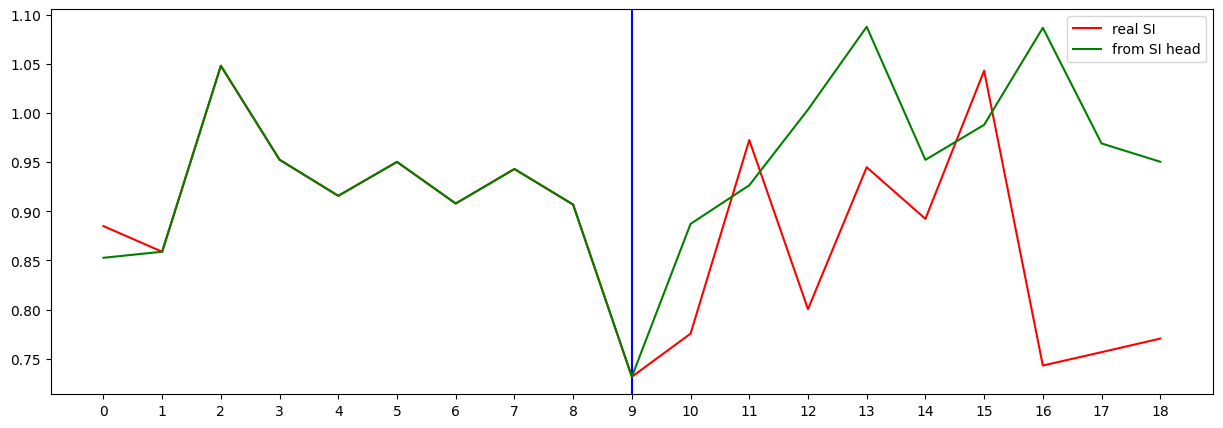

Testing R**2 - (all) - (no inputs):  0.9946173704598218
Testing R**2 - (f2) - SI full (no inputs):  -2.9645236664589514
Testing R**2 - SI head only (no inputs):  -2.159128705167262
0 ...index R**2 (no inputs):  -0.45103530070504716
1 ...index R**2 (no inputs):  -0.6751335724185661
2 ...index R**2 (no inputs):  -2.9645236664589514
3 ...index R**2 (no inputs):  -1.3986179877838971
4 ...index R**2 (no inputs):  -0.032541813487070526
5 ...index R**2 (no inputs):  -0.2109301857106678
6 ...index R**2 (no inputs):  -0.5168321668002287
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.0304762054216878
10 ...index R**2 (no inputs):  -0.1195011662284331
11 ...index R**2 (no inputs):  -0.8315951502082453
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.2660448781311626
16 ...index R**2 (no inputs):  0.19969951587256662
17 ...index R**2 (no inputs):  -0.118763

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.947397
Loss_SI: 0.8056710958480835 Loss_all: 1.2780896425247192
===
[200] Train Loss: 0.248283
Loss_SI: 0.16158664226531982 Loss_all: 0.4505751132965088
===
[400] Train Loss: 0.134782
Loss_SI: 0.07148043811321259 Loss_all: 0.2824847996234894
===
[600] Train Loss: 0.114656
Loss_SI: 0.042925409972667694 Loss_all: 0.28202587366104126
===
[800] Train Loss: 0.084105
Loss_SI: 0.03527773916721344 Loss_all: 0.19803661108016968
===


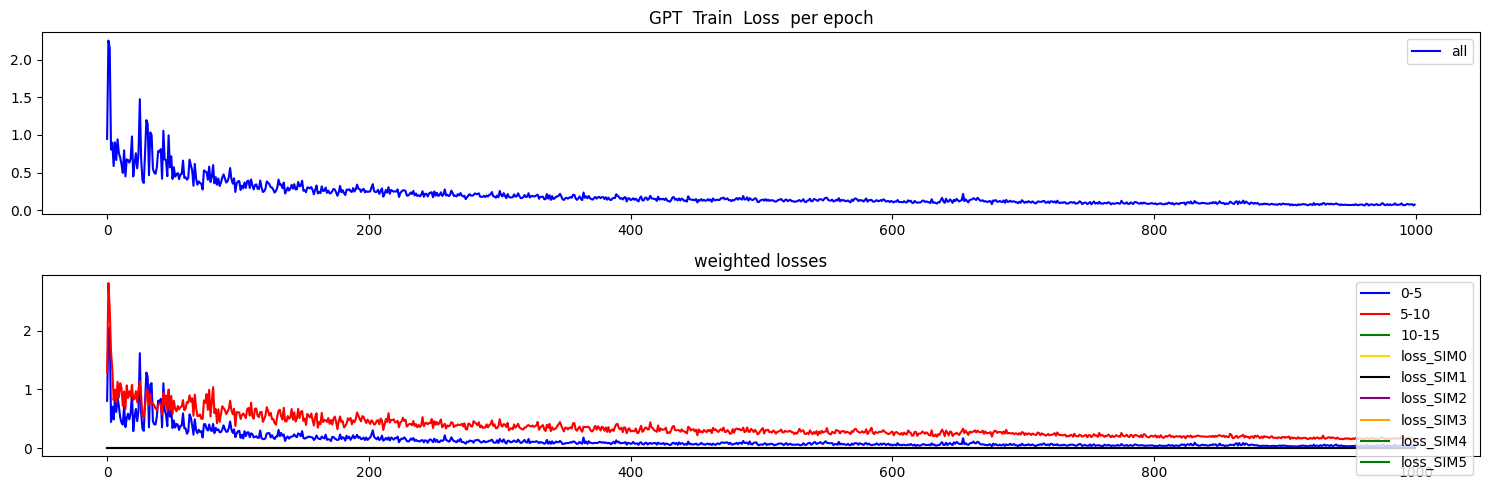

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


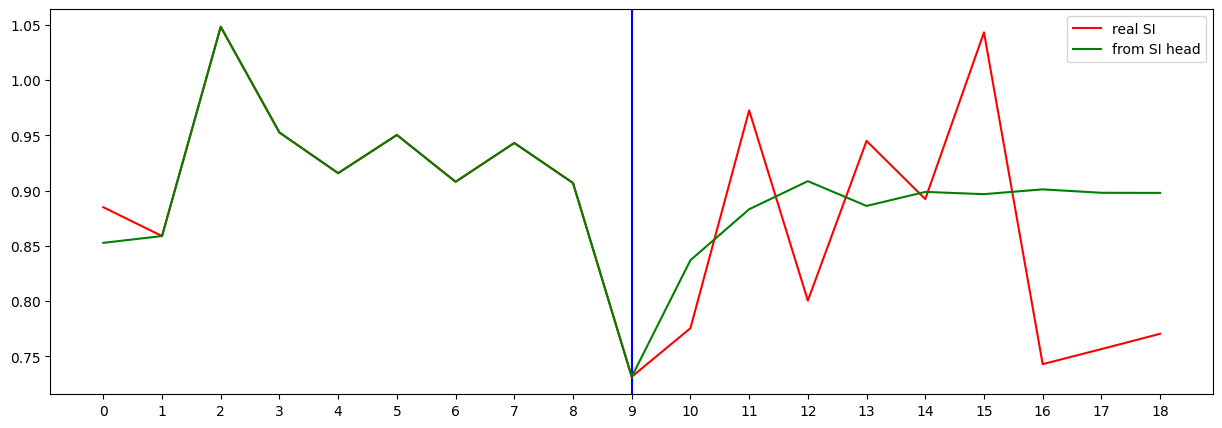

Testing R**2 - (all) - (no inputs):  0.9951998238295633
Testing R**2 - (f2) - SI full (no inputs):  -0.11925228052064907
Testing R**2 - SI head only (no inputs):  -0.1971097802099484
0 ...index R**2 (no inputs):  0.032066967066859964
1 ...index R**2 (no inputs):  -2.084407775132753
2 ...index R**2 (no inputs):  -0.11925228052064907
3 ...index R**2 (no inputs):  -0.6583457039088205
4 ...index R**2 (no inputs):  -1.0945708478130034
5 ...index R**2 (no inputs):  -0.08012829462399029
6 ...index R**2 (no inputs):  -0.34879228369556814
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.1544665972546184
10 ...index R**2 (no inputs):  -0.09518070839912363
11 ...index R**2 (no inputs):  -0.6035182334978841
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.2941498672241607
16 ...index R**2 (no inputs):  -0.6516923779535309
17 ...index R**2 (no inputs):  -3.37

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.937137
Loss_SI: 0.769383430480957 Loss_all: 1.32856285572052
===
[200] Train Loss: 0.366984
Loss_SI: 0.2097105085849762 Loss_all: 0.7339564561843872
===
[400] Train Loss: 0.199209
Loss_SI: 0.1229805126786232 Loss_all: 0.37707602977752686
===
[600] Train Loss: 0.174864
Loss_SI: 0.08486589789390564 Loss_all: 0.38485899567604065
===
[800] Train Loss: 0.143691
Loss_SI: 0.09573355317115784 Loss_all: 0.2555915117263794
===


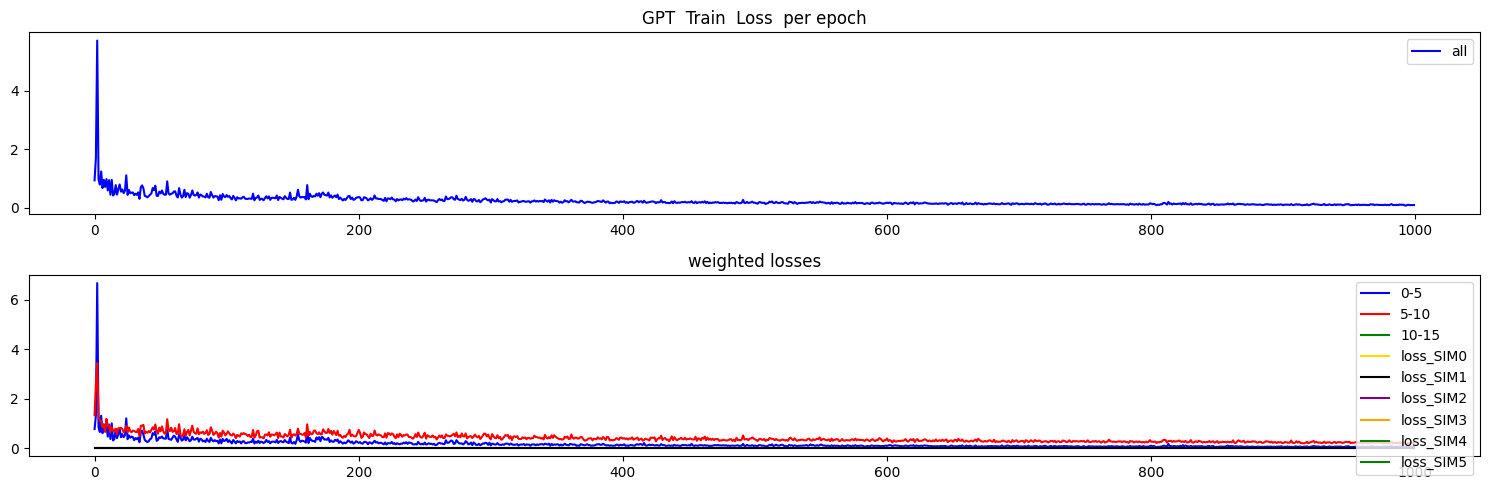

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


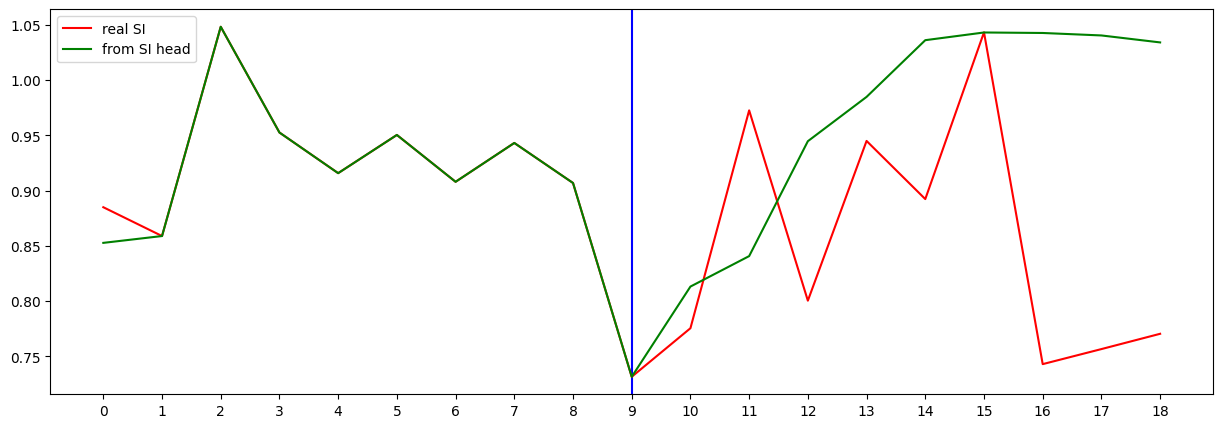

Testing R**2 - (all) - (no inputs):  0.9907933961875021
Testing R**2 - (f2) - SI full (no inputs):  -4.272364617503431
Testing R**2 - SI head only (no inputs):  -2.3416151559883436
0 ...index R**2 (no inputs):  0.023867671967410464
1 ...index R**2 (no inputs):  -0.24088739894900923
2 ...index R**2 (no inputs):  -4.272364617503431
3 ...index R**2 (no inputs):  -0.8313454714785746
4 ...index R**2 (no inputs):  -0.36293970821393584
5 ...index R**2 (no inputs):  -1.06371406846598
6 ...index R**2 (no inputs):  -1.0499664930001962
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7507310925171333
10 ...index R**2 (no inputs):  -0.2654130815368565
11 ...index R**2 (no inputs):  -24.944173195277255
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.7322882660236745
16 ...index R**2 (no inputs):  -0.06614049215617834
17 ...index R**2 (no inputs):  -58.3972676

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.236225
Loss_SI: 1.0881280899047852 Loss_all: 1.5817853212356567
===
[200] Train Loss: 0.119764
Loss_SI: 0.04872883856296539 Loss_all: 0.2855127453804016
===
[400] Train Loss: 0.053649
Loss_SI: 0.027720391750335693 Loss_all: 0.11414777487516403
===
[600] Train Loss: 0.029565
Loss_SI: 0.011609801091253757 Loss_all: 0.07145965844392776
===
[800] Train Loss: 0.023926
Loss_SI: 0.011721258983016014 Loss_all: 0.05240331217646599
===


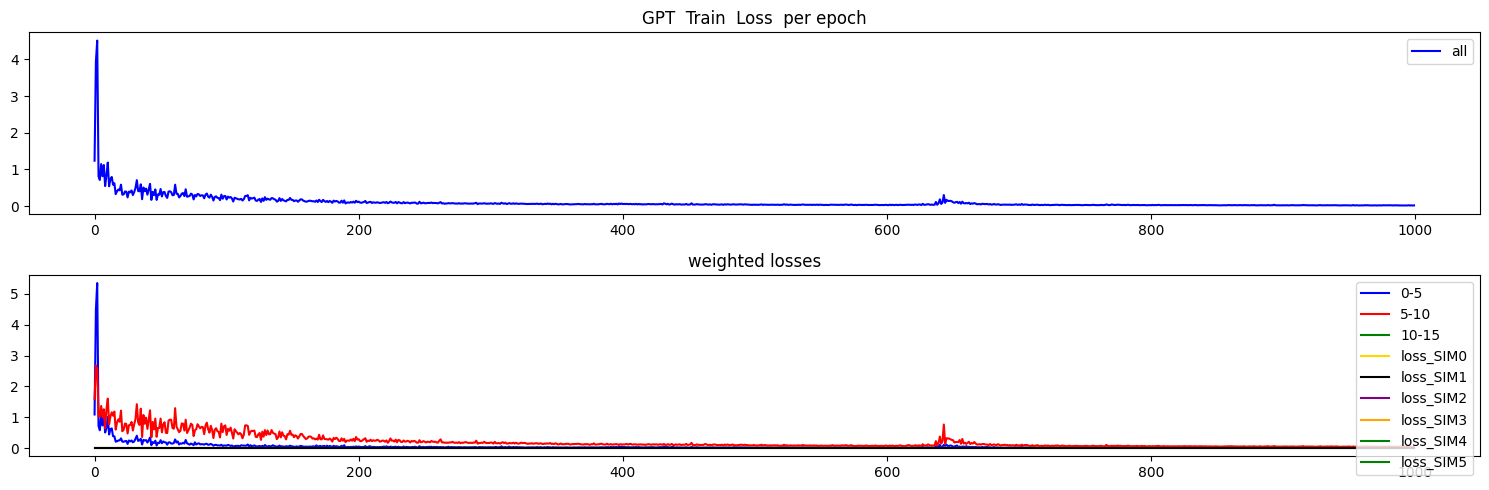

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


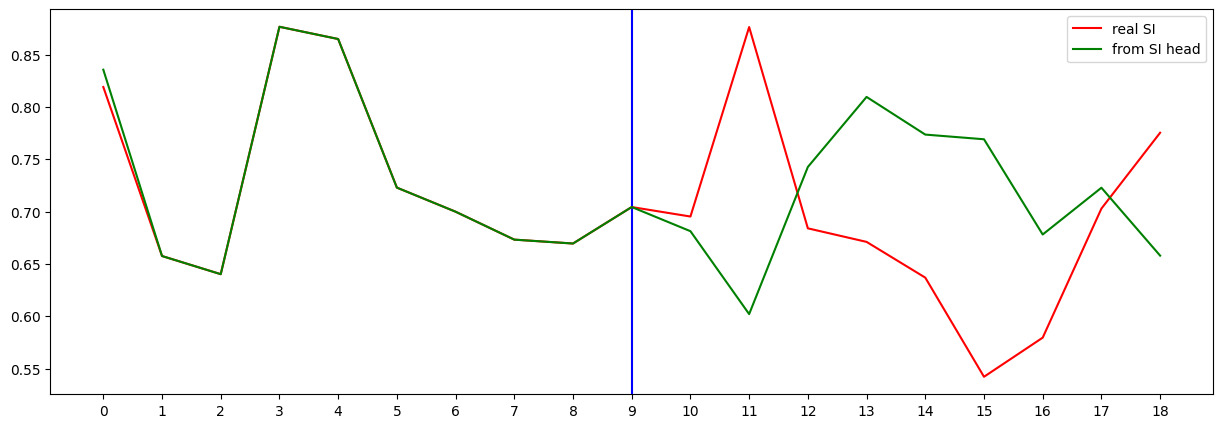

Testing R**2 - (all) - (no inputs):  0.9969484991031204
Testing R**2 - (f2) - SI full (no inputs):  -2.122201084426367
Testing R**2 - SI head only (no inputs):  -1.0804066992304695
0 ...index R**2 (no inputs):  -0.4095125535701818
1 ...index R**2 (no inputs):  -0.41174237008250025
2 ...index R**2 (no inputs):  -2.122201084426367
3 ...index R**2 (no inputs):  -0.929625262447836
4 ...index R**2 (no inputs):  -3.7093144679899126
5 ...index R**2 (no inputs):  -0.19603397355190455
6 ...index R**2 (no inputs):  -2.6859475460126947
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.890355497501157
10 ...index R**2 (no inputs):  -0.5049543530465319
11 ...index R**2 (no inputs):  -45.97647913156378
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4531729148745314
16 ...index R**2 (no inputs):  -8.458819437335979
17 ...index R**2 (no inputs):  -80.8590805053

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.728602
Loss_SI: 0.5363502502441406 Loss_all: 1.1771894693374634
===
[200] Train Loss: 0.127281
Loss_SI: 0.05958908423781395 Loss_all: 0.28523001074790955
===
[400] Train Loss: 0.109520
Loss_SI: 0.07269471883773804 Loss_all: 0.1954459846019745
===
[600] Train Loss: 0.067071
Loss_SI: 0.027414411306381226 Loss_all: 0.15960240364074707
===
[800] Train Loss: 0.047447
Loss_SI: 0.021401245146989822 Loss_all: 0.10822039842605591
===


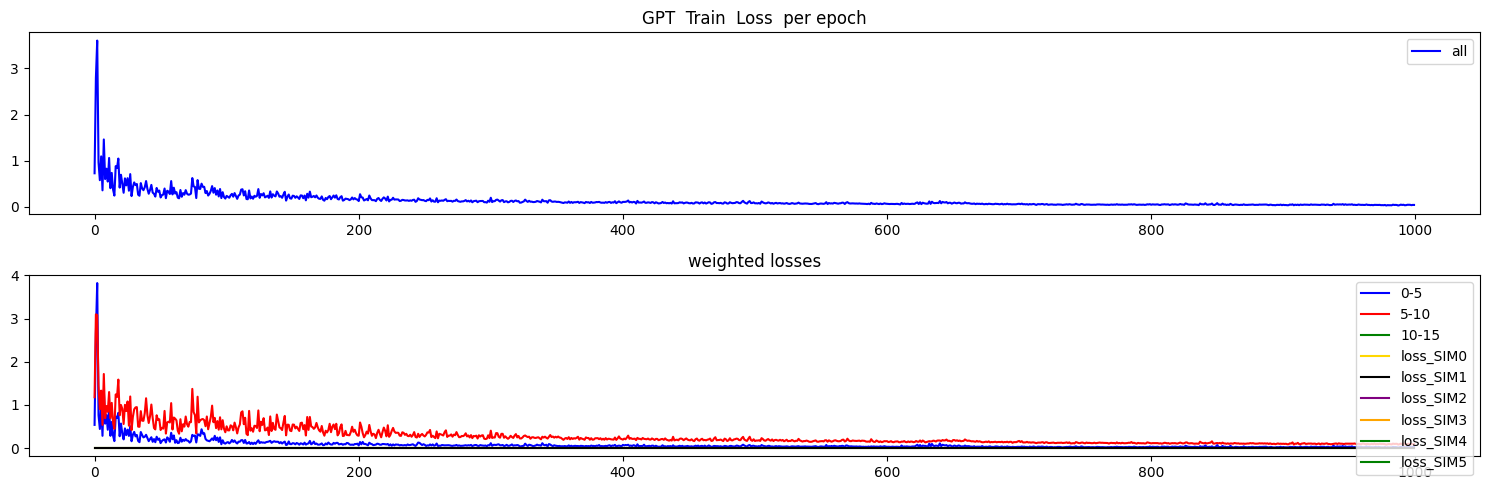

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


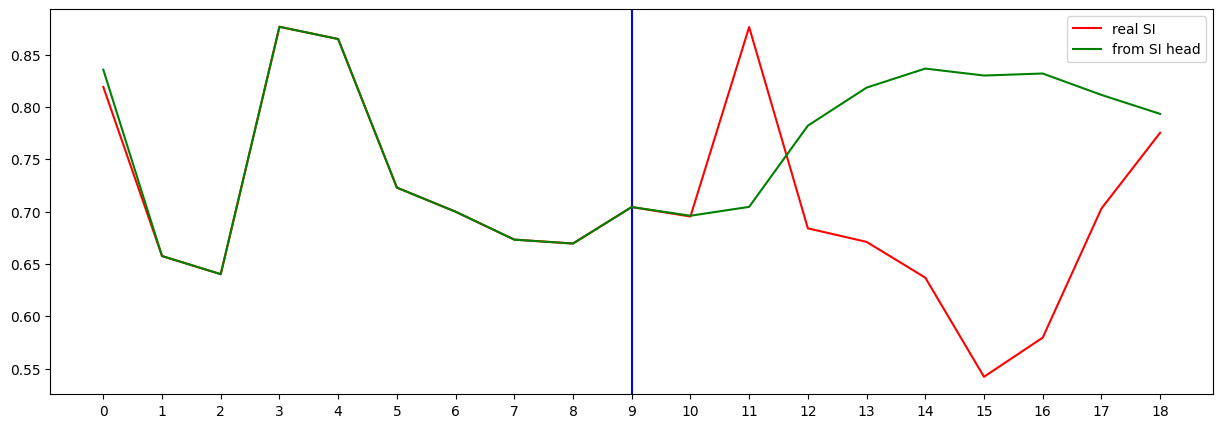

Testing R**2 - (all) - (no inputs):  0.99709850415533
Testing R**2 - (f2) - SI full (no inputs):  -2.413103460278765
Testing R**2 - SI head only (no inputs):  -1.5809028259581015
0 ...index R**2 (no inputs):  -0.9058179833962776
1 ...index R**2 (no inputs):  -0.29261528201625864
2 ...index R**2 (no inputs):  -2.413103460278765
3 ...index R**2 (no inputs):  -2.1149424175784675
4 ...index R**2 (no inputs):  -3.097595183671822
5 ...index R**2 (no inputs):  -0.13802723061227673
6 ...index R**2 (no inputs):  -27.534631503106862
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.302203819072551
10 ...index R**2 (no inputs):  -0.6344472828813534
11 ...index R**2 (no inputs):  -40.155232011868506
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.163299029348655
16 ...index R**2 (no inputs):  -7.745712007499456
17 ...index R**2 (no inputs):  -46.675637054443

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.733419
Loss_SI: 0.5526890754699707 Loss_all: 1.1551214456558228
===
[200] Train Loss: 0.333411
Loss_SI: 0.20503459870815277 Loss_all: 0.6329565644264221
===
[400] Train Loss: 0.162384
Loss_SI: 0.0829300656914711 Loss_all: 0.3477758765220642
===
[600] Train Loss: 0.124930
Loss_SI: 0.060503292828798294 Loss_all: 0.2752583920955658
===
[800] Train Loss: 0.078593
Loss_SI: 0.03334445878863335 Loss_all: 0.1841735988855362
===


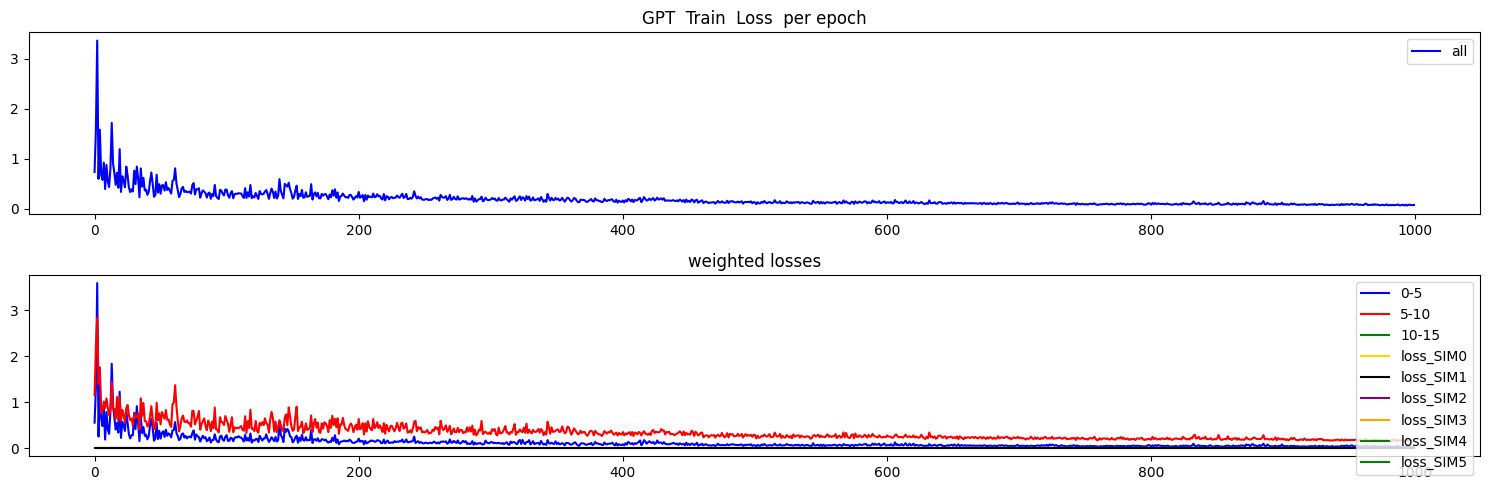

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


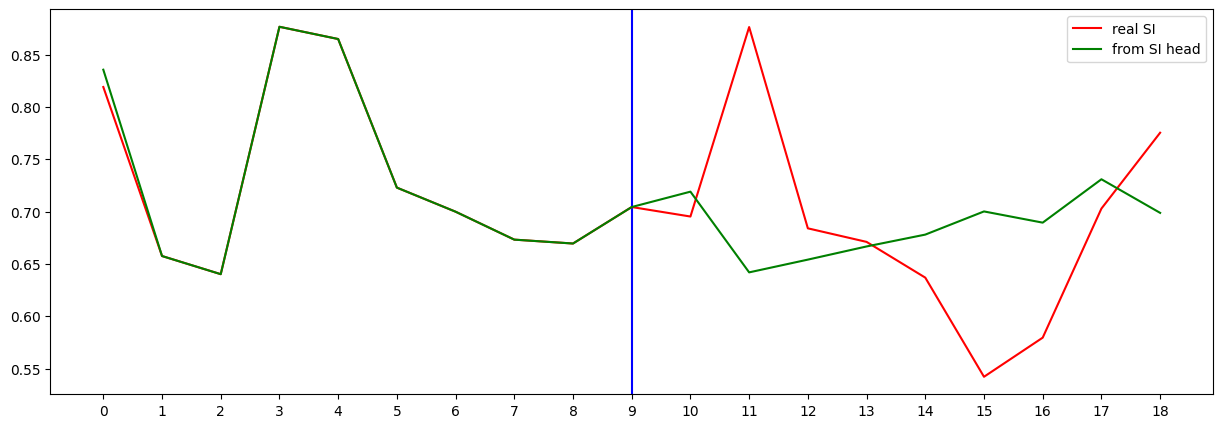

Testing R**2 - (all) - (no inputs):  0.9973118648235789
Testing R**2 - (f2) - SI full (no inputs):  -0.5887168330142356
Testing R**2 - SI head only (no inputs):  0.18988115783354187
0 ...index R**2 (no inputs):  0.11331386921476305
1 ...index R**2 (no inputs):  -1.3052543507837635
2 ...index R**2 (no inputs):  -0.5887168330142356
3 ...index R**2 (no inputs):  -0.496007410368559
4 ...index R**2 (no inputs):  -2.0702432537882838
5 ...index R**2 (no inputs):  -0.05157759738841983
6 ...index R**2 (no inputs):  -26.706396982594956
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4907730668303056
10 ...index R**2 (no inputs):  -1.141563386953139
11 ...index R**2 (no inputs):  -186.11603711074096
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1059344592965639
16 ...index R**2 (no inputs):  -11.174287528252249
17 ...index R**2 (no inputs):  -137.620943

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.715725
Loss_SI: 0.39042648673057556 Loss_all: 1.4747540950775146
===
[200] Train Loss: 0.242054
Loss_SI: 0.1305893063545227 Loss_all: 0.5021370649337769
===
[400] Train Loss: 0.183739
Loss_SI: 0.09415847063064575 Loss_all: 0.3927610218524933
===
[600] Train Loss: 0.101501
Loss_SI: 0.05731741711497307 Loss_all: 0.2045954167842865
===
[800] Train Loss: 0.094105
Loss_SI: 0.045822836458683014 Loss_all: 0.2067636251449585
===


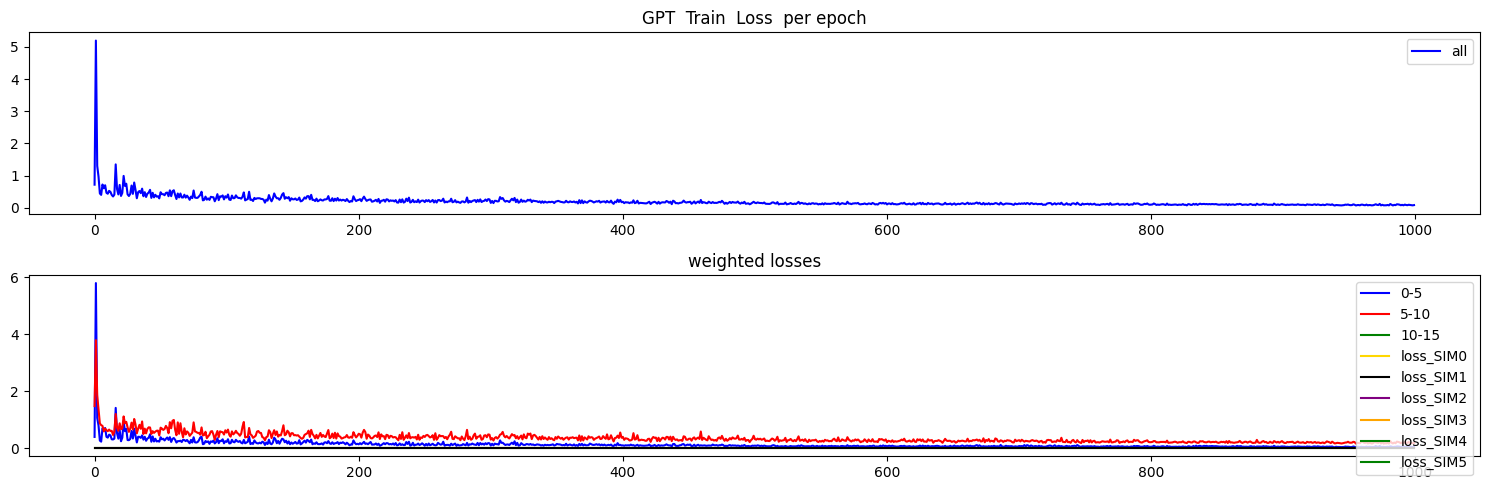

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


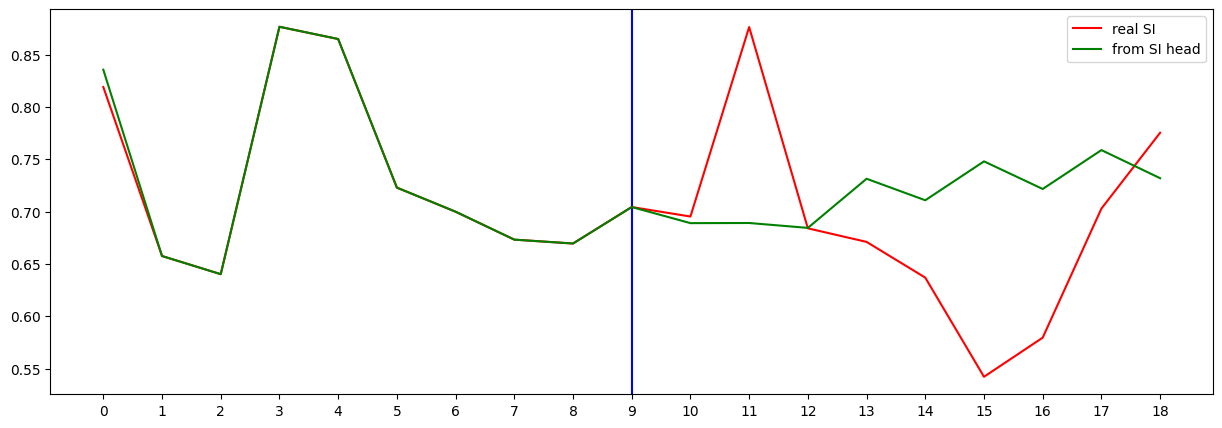

Testing R**2 - (all) - (no inputs):  0.9933677191229898
Testing R**2 - (f2) - SI full (no inputs):  -0.33124242179649044
Testing R**2 - SI head only (no inputs):  -0.14502640104986164
0 ...index R**2 (no inputs):  -0.47524517747688466
1 ...index R**2 (no inputs):  -1.3016543452540281
2 ...index R**2 (no inputs):  -0.33124242179649044
3 ...index R**2 (no inputs):  -5.430766378637906
4 ...index R**2 (no inputs):  -21.47706077480519
5 ...index R**2 (no inputs):  -1.5699796502616996
6 ...index R**2 (no inputs):  -202.84479678475543
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.053058409304677
10 ...index R**2 (no inputs):  -3.0009980148502757
11 ...index R**2 (no inputs):  -381.53345720779987
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3794236161375468
16 ...index R**2 (no inputs):  -26.296708491964587
17 ...index R**2 (no inputs):  -1230.861

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.492035
Loss_SI: 0.25301212072372437 Loss_all: 1.0497546195983887
===
[200] Train Loss: 0.097793
Loss_SI: 0.0485745407640934 Loss_all: 0.21263569593429565
===
[400] Train Loss: 0.041633
Loss_SI: 0.02117048017680645 Loss_all: 0.08938023447990417
===
[600] Train Loss: 0.023134
Loss_SI: 0.01047421619296074 Loss_all: 0.0526730976998806
===
[800] Train Loss: 0.028623
Loss_SI: 0.017389247193932533 Loss_all: 0.05483544245362282
===


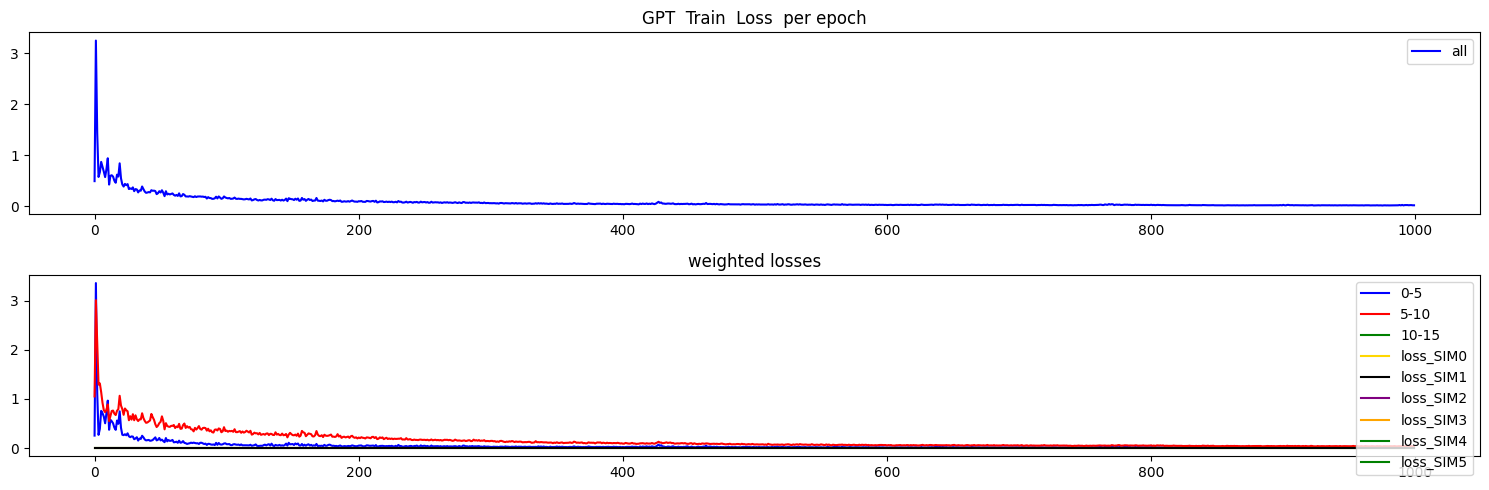

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


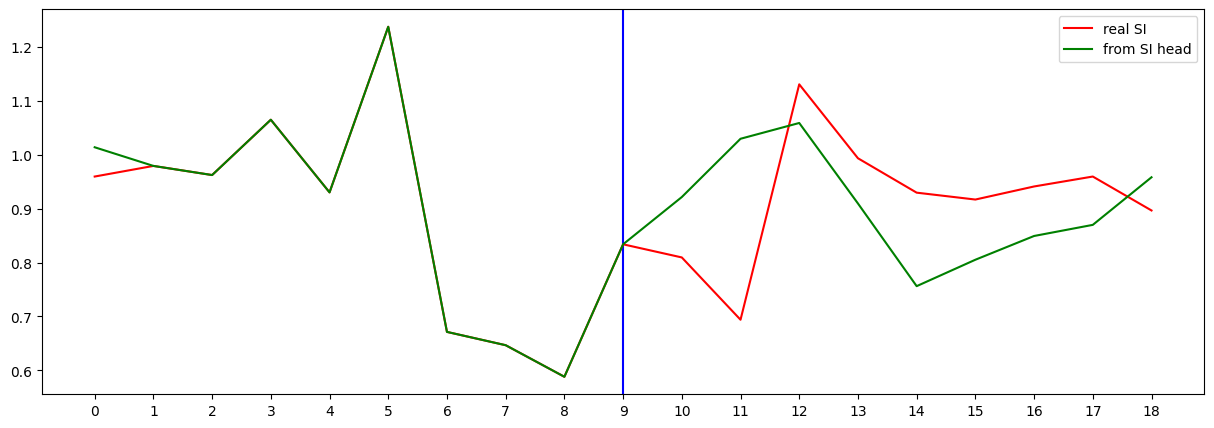

Testing R**2 - (all) - (no inputs):  0.9666362534983555
Testing R**2 - (f2) - SI full (no inputs):  -1.373992580979451
Testing R**2 - SI head only (no inputs):  -0.203892888432319
0 ...index R**2 (no inputs):  -0.3869419143808892
1 ...index R**2 (no inputs):  -0.514386448670511
2 ...index R**2 (no inputs):  -1.373992580979451
3 ...index R**2 (no inputs):  -7.784165333270163
4 ...index R**2 (no inputs):  -0.5041700648795548
5 ...index R**2 (no inputs):  -24.48014603302145
6 ...index R**2 (no inputs):  0.03886881881253812
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.018198472242043
10 ...index R**2 (no inputs):  -0.910868397475358
11 ...index R**2 (no inputs):  -2271.362747086804
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.31367133516400447
16 ...index R**2 (no inputs):  0.330746123002597
17 ...index R**2 (no inputs):  -430.1676422230888
18

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.265215
Loss_SI: 1.1131863594055176 Loss_all: 1.6199491024017334
===
[200] Train Loss: 0.159348
Loss_SI: 0.09508872032165527 Loss_all: 0.30928730964660645
===
[400] Train Loss: 0.099367
Loss_SI: 0.04730820283293724 Loss_all: 0.22083738446235657
===
[600] Train Loss: 0.067595
Loss_SI: 0.03923749923706055 Loss_all: 0.13376334309577942
===
[800] Train Loss: 0.062434
Loss_SI: 0.03638019040226936 Loss_all: 0.12322497367858887
===


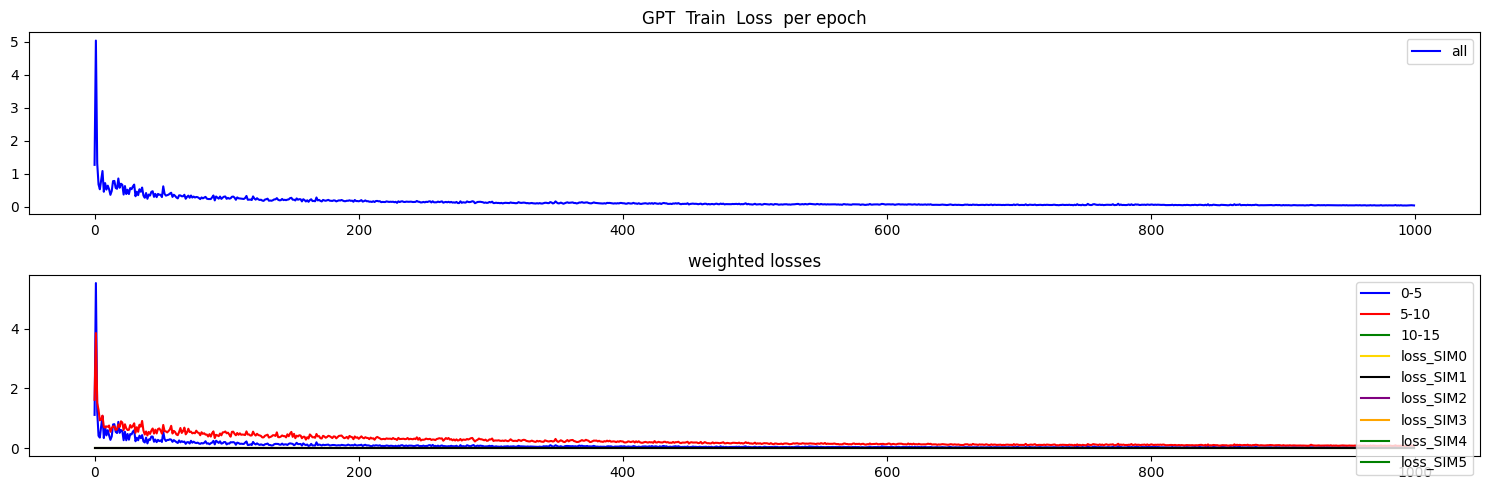

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


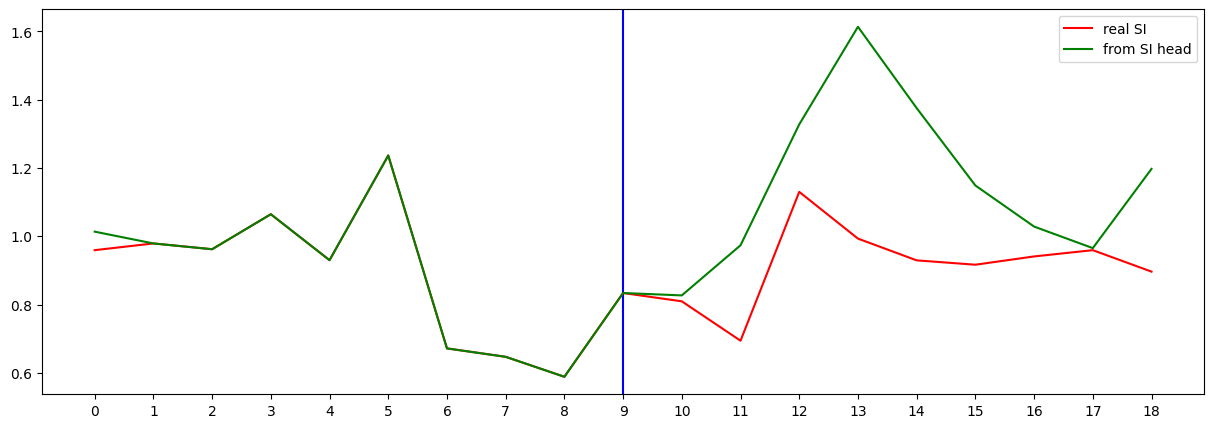

Testing R**2 - (all) - (no inputs):  0.9731776266931074
Testing R**2 - (f2) - SI full (no inputs):  -9.717216801474134
Testing R**2 - SI head only (no inputs):  -8.1857533814529
0 ...index R**2 (no inputs):  -1.8666010613002832
1 ...index R**2 (no inputs):  -5.448798904275903
2 ...index R**2 (no inputs):  -9.717216801474134
3 ...index R**2 (no inputs):  -3.7449808398079263
4 ...index R**2 (no inputs):  -31.99830921860434
5 ...index R**2 (no inputs):  -19.221122601379157
6 ...index R**2 (no inputs):  -2.8634507688230513
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5665906438290986
10 ...index R**2 (no inputs):  -0.8697288293942742
11 ...index R**2 (no inputs):  -178.6065430085432
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6074737290748622
16 ...index R**2 (no inputs):  -2.4303908787817297
17 ...index R**2 (no inputs):  -1456.965129039143

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.617500
Loss_SI: 0.3942425549030304 Loss_all: 1.1384341716766357
===
[200] Train Loss: 0.366096
Loss_SI: 0.28474923968315125 Loss_all: 0.5559040307998657
===
[400] Train Loss: 0.185255
Loss_SI: 0.09489709138870239 Loss_all: 0.3960908353328705
===
[600] Train Loss: 0.099367
Loss_SI: 0.05115087330341339 Loss_all: 0.2118729054927826
===
[800] Train Loss: 0.099397
Loss_SI: 0.049107685685157776 Loss_all: 0.21673797070980072
===


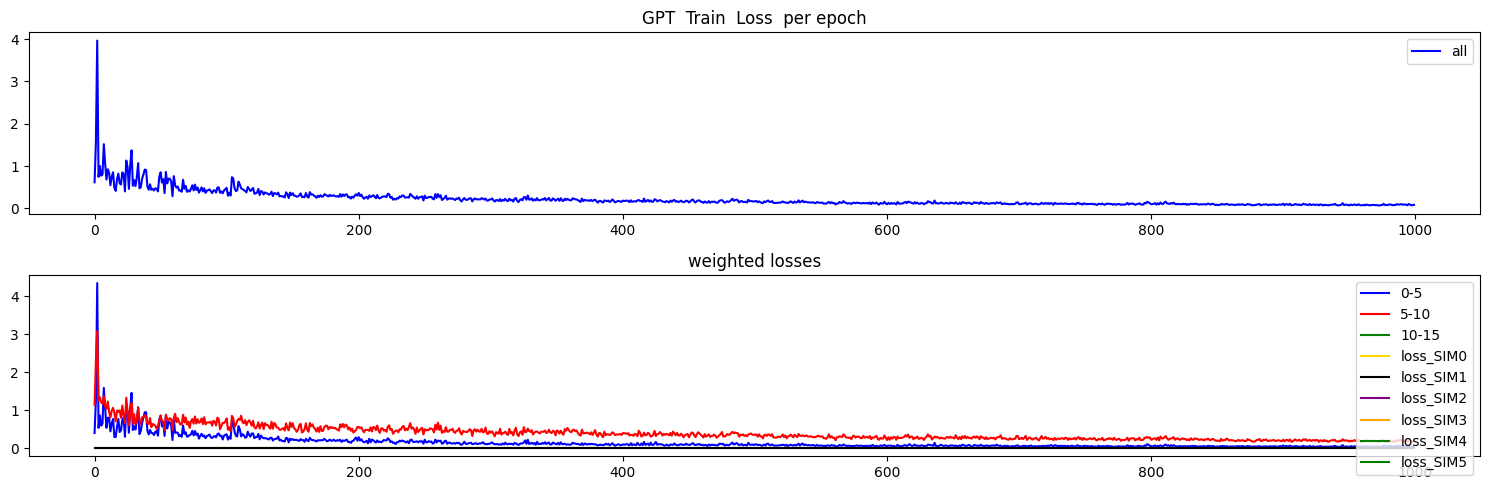

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


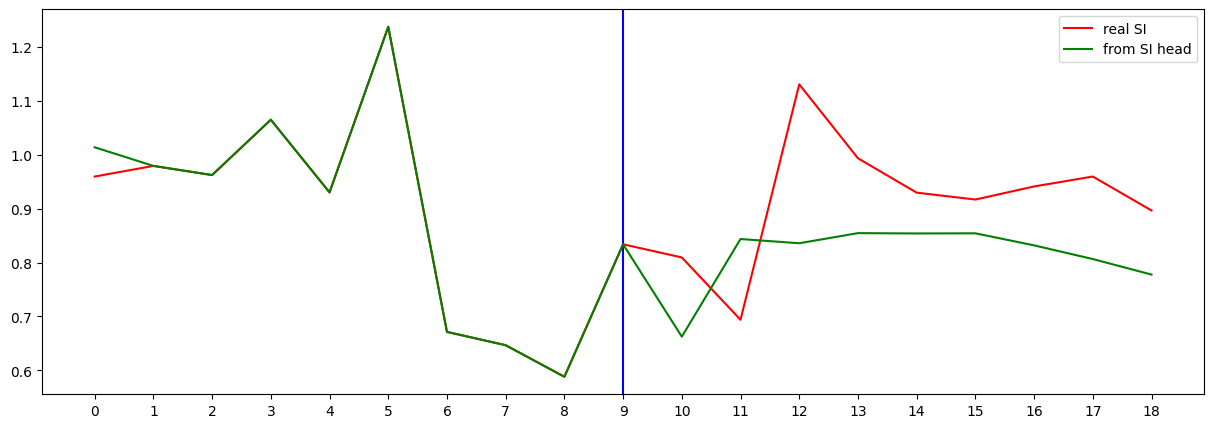

Testing R**2 - (all) - (no inputs):  0.9590363395305108
Testing R**2 - (f2) - SI full (no inputs):  -3.0798277243508405
Testing R**2 - SI head only (no inputs):  -0.7772590423895509
0 ...index R**2 (no inputs):  0.185956504830188
1 ...index R**2 (no inputs):  -0.4655971940174326
2 ...index R**2 (no inputs):  -3.0798277243508405
3 ...index R**2 (no inputs):  -324.67312495165476
4 ...index R**2 (no inputs):  -313.4510445391913
5 ...index R**2 (no inputs):  -29.914590843363133
6 ...index R**2 (no inputs):  -4.064901161685051
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09313852718646931
10 ...index R**2 (no inputs):  -1.098619478165836
11 ...index R**2 (no inputs):  -28.683745783684117
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.11077079180348415
16 ...index R**2 (no inputs):  -2.4186148377223913
17 ...index R**2 (no inputs):  -899.521482337

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.724273
Loss_SI: 0.5882819294929504 Loss_all: 1.041584849357605
===
[200] Train Loss: 0.317895
Loss_SI: 0.2391151636838913 Loss_all: 0.501713752746582
===
[400] Train Loss: 0.201501
Loss_SI: 0.1449904888868332 Loss_all: 0.3333602845668793
===
[600] Train Loss: 0.158786
Loss_SI: 0.10649943351745605 Loss_all: 0.280788391828537
===
[800] Train Loss: 0.103304
Loss_SI: 0.06042188033461571 Loss_all: 0.2033635377883911
===


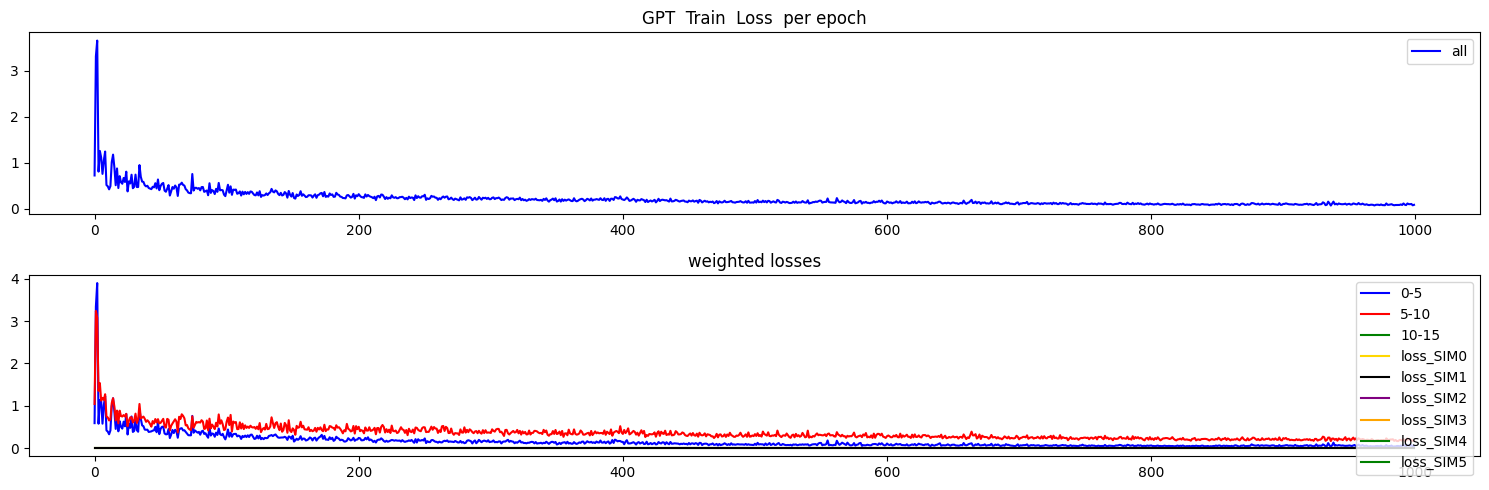

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


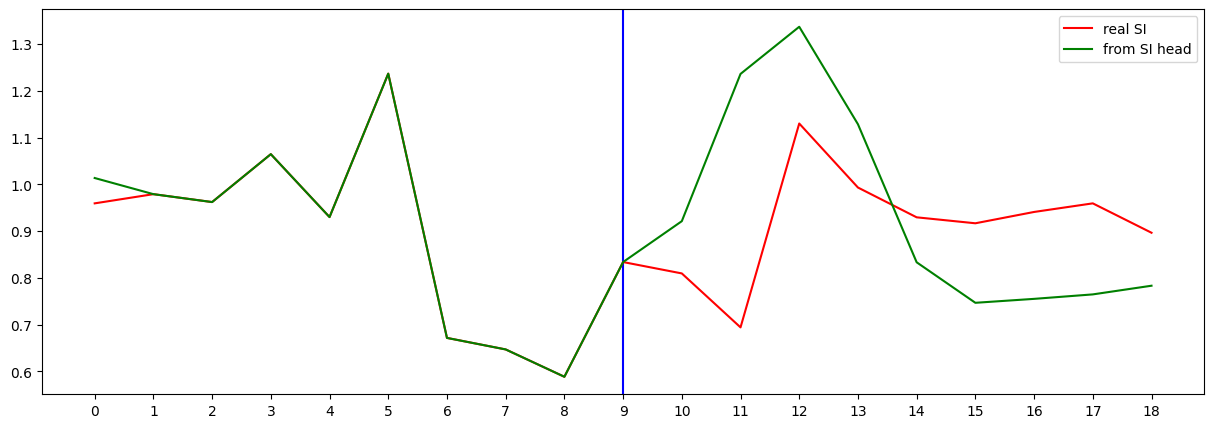

Testing R**2 - (all) - (no inputs):  0.9771605405463073
Testing R**2 - (f2) - SI full (no inputs):  -4.879073785526411
Testing R**2 - SI head only (no inputs):  -2.466272225480115
0 ...index R**2 (no inputs):  -0.2233323218412362
1 ...index R**2 (no inputs):  -1.593236481866914
2 ...index R**2 (no inputs):  -4.879073785526411
3 ...index R**2 (no inputs):  -25.567879679733863
4 ...index R**2 (no inputs):  -38.51923072371794
5 ...index R**2 (no inputs):  -15.804831220906227
6 ...index R**2 (no inputs):  -2.863856877107499
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7708289534897323
10 ...index R**2 (no inputs):  -2.155569689156229
11 ...index R**2 (no inputs):  -22.150567562380562
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4178530594600365
16 ...index R**2 (no inputs):  -1.9014825082780002
17 ...index R**2 (no inputs):  -3347.50790469608

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.831157
Loss_SI: 0.6723732352256775 Loss_all: 1.2016531229019165
===
[200] Train Loss: 0.100596
Loss_SI: 0.056133389472961426 Loss_all: 0.204342782497406
===
[400] Train Loss: 0.061513
Loss_SI: 0.04294062405824661 Loss_all: 0.104847751557827
===
[600] Train Loss: 0.029742
Loss_SI: 0.01732828840613365 Loss_all: 0.05870785936713219
===
[800] Train Loss: 0.021137
Loss_SI: 0.010363194160163403 Loss_all: 0.046274326741695404
===


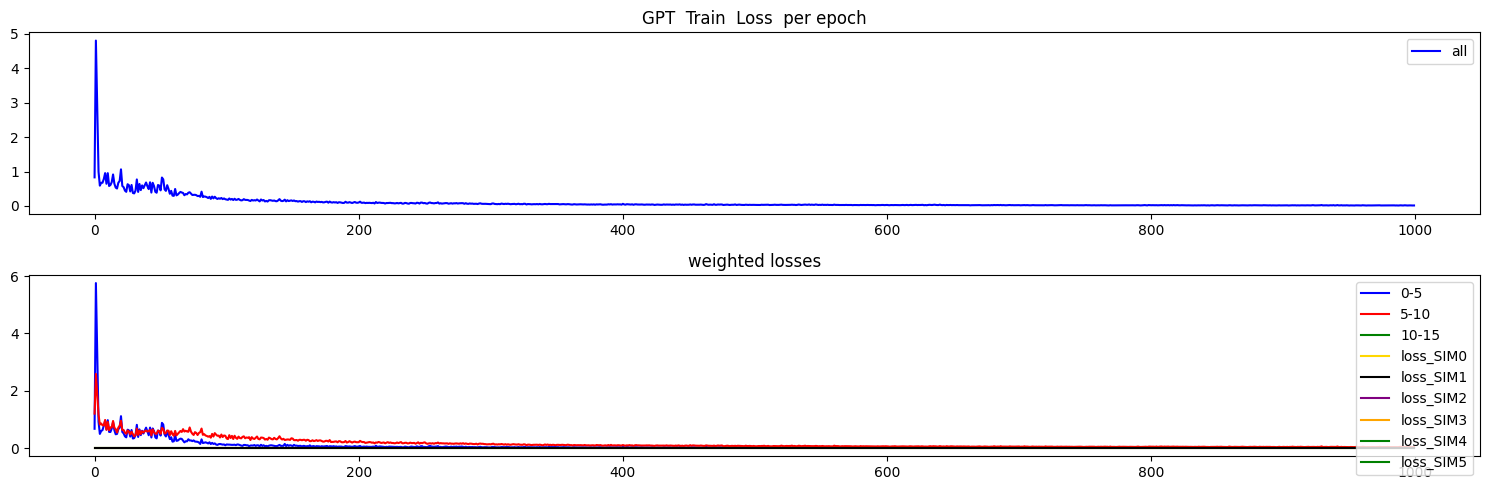

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


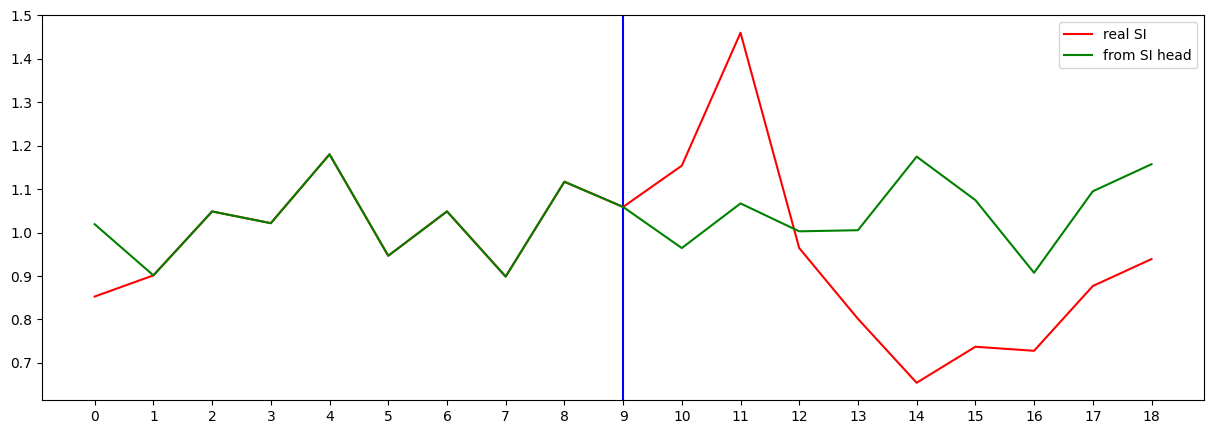

Testing R**2 - (all) - (no inputs):  0.9832010617237369
Testing R**2 - (f2) - SI full (no inputs):  -0.9566917106901729
Testing R**2 - SI head only (no inputs):  -0.899981157652141
0 ...index R**2 (no inputs):  -0.611043607983317
1 ...index R**2 (no inputs):  -1.2399526302629194
2 ...index R**2 (no inputs):  -0.9566917106901729
3 ...index R**2 (no inputs):  -0.018414832434155315
4 ...index R**2 (no inputs):  -58.8601653515062
5 ...index R**2 (no inputs):  -8.307840247743552
6 ...index R**2 (no inputs):  -1307.0114770092516
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.284467032291191
10 ...index R**2 (no inputs):  -4.328567770635209
11 ...index R**2 (no inputs):  -8.663760501953007
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6621982120388479
16 ...index R**2 (no inputs):  -0.6047857959685243
17 ...index R**2 (no inputs):  -17.136567652560

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.952500
Loss_SI: 0.7939661145210266 Loss_all: 1.3224114179611206
===
[200] Train Loss: 0.165222
Loss_SI: 0.0887933149933815 Loss_all: 0.34355539083480835
===
[400] Train Loss: 0.101582
Loss_SI: 0.045951858162879944 Loss_all: 0.23138655722141266
===
[600] Train Loss: 0.075004
Loss_SI: 0.03585321456193924 Loss_all: 0.1663569062948227
===
[800] Train Loss: 0.052524
Loss_SI: 0.024429095908999443 Loss_all: 0.11808004975318909
===


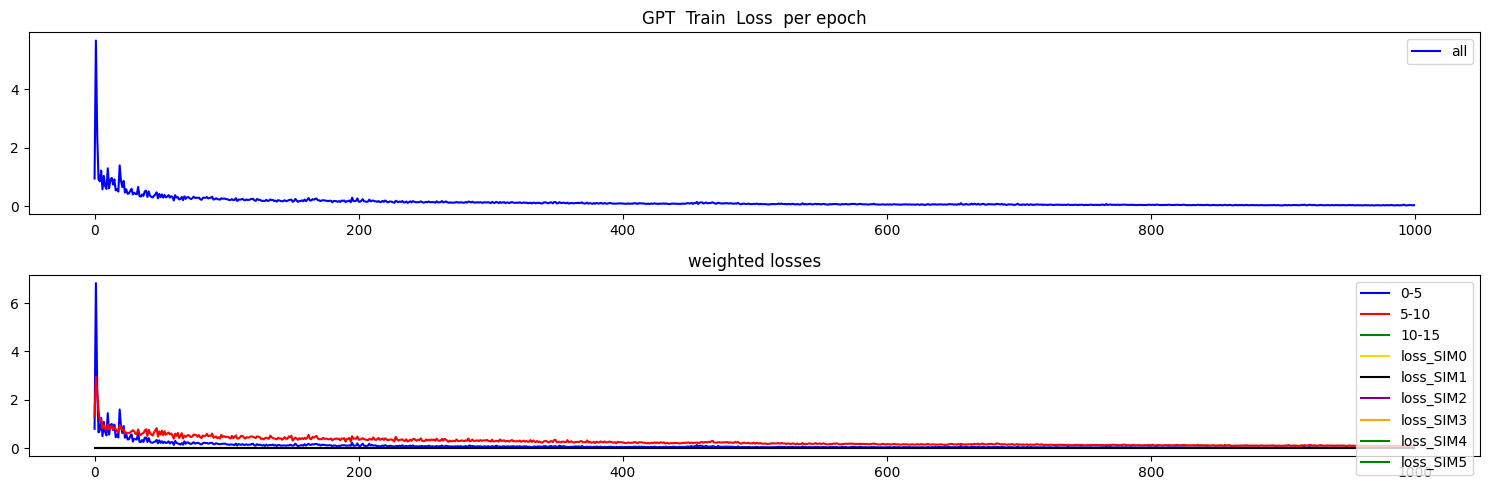

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


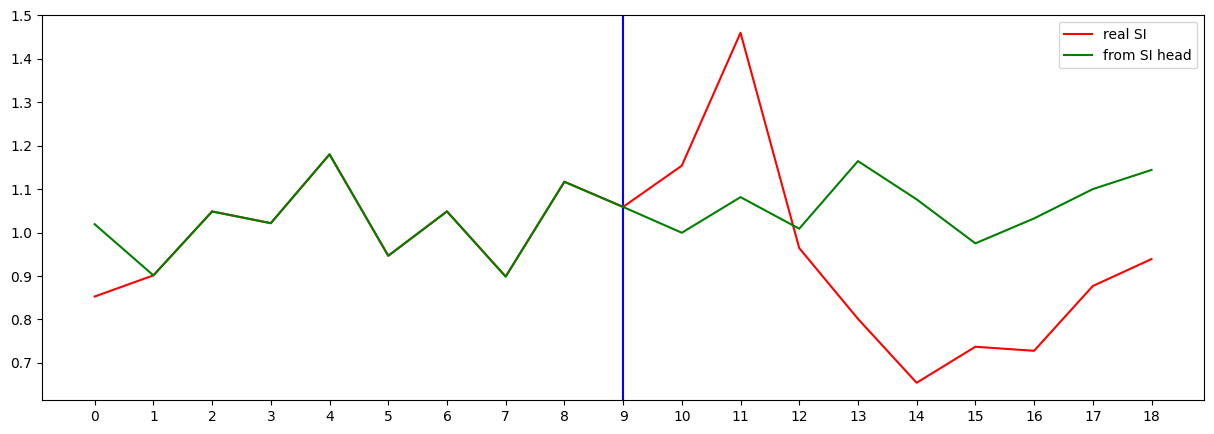

Testing R**2 - (all) - (no inputs):  0.9923090156073898
Testing R**2 - (f2) - SI full (no inputs):  -1.0356502503903484
Testing R**2 - SI head only (no inputs):  -0.8787284993753945
0 ...index R**2 (no inputs):  -0.7641242408740876
1 ...index R**2 (no inputs):  -1.6709364393237163
2 ...index R**2 (no inputs):  -1.0356502503903484
3 ...index R**2 (no inputs):  -0.5783989491886183
4 ...index R**2 (no inputs):  -51.399877360796026
5 ...index R**2 (no inputs):  -3.251600696426838
6 ...index R**2 (no inputs):  -370.7875785884132
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.0818158979430246
10 ...index R**2 (no inputs):  -1.830508032675238
11 ...index R**2 (no inputs):  -11.072407916596498
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1433064748061217
16 ...index R**2 (no inputs):  -1.217972988771288
17 ...index R**2 (no inputs):  -12.5122578745

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.559859
Loss_SI: 0.3391086161136627 Loss_all: 1.0749436616897583
===
[200] Train Loss: 0.270057
Loss_SI: 0.16282880306243896 Loss_all: 0.520257830619812
===
[400] Train Loss: 0.157572
Loss_SI: 0.07692096382379532 Loss_all: 0.3457581400871277
===
[600] Train Loss: 0.130256
Loss_SI: 0.06602845340967178 Loss_all: 0.2801210284233093
===
[800] Train Loss: 0.083289
Loss_SI: 0.03862890601158142 Loss_all: 0.1874961107969284
===


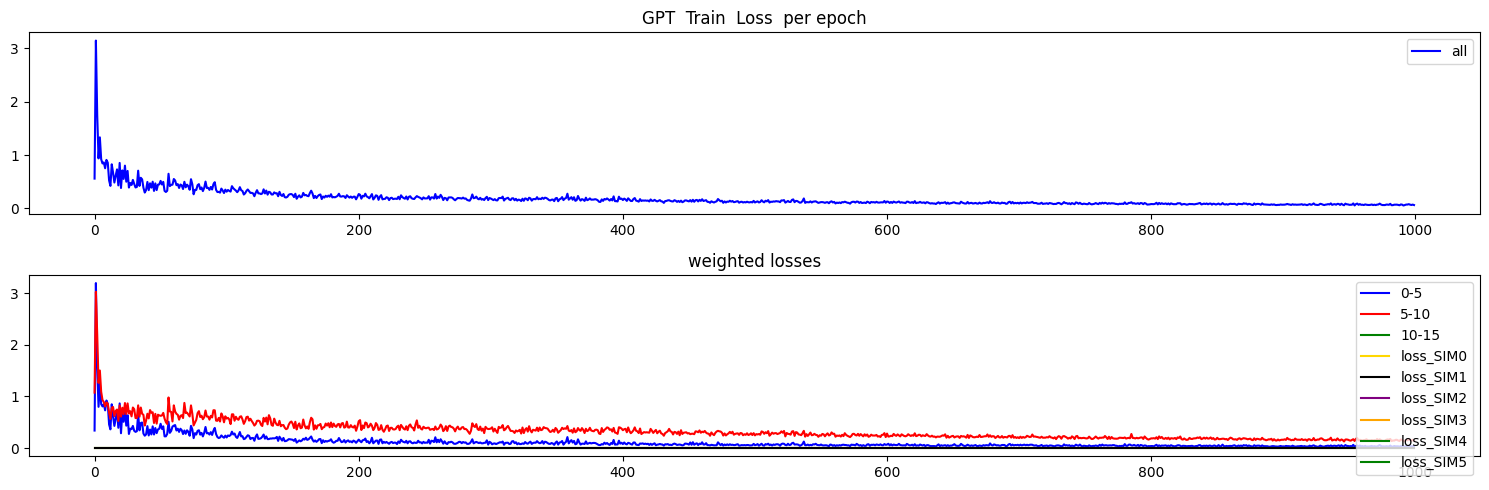

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


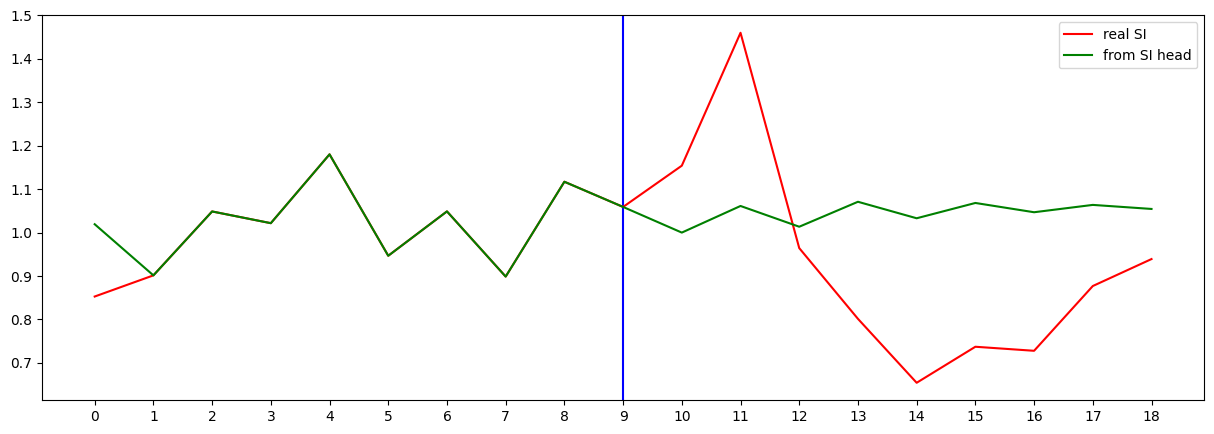

Testing R**2 - (all) - (no inputs):  0.9941737951163269
Testing R**2 - (f2) - SI full (no inputs):  -0.9519325116891844
Testing R**2 - SI head only (no inputs):  -0.6269791969417895
0 ...index R**2 (no inputs):  -0.3000135653043434
1 ...index R**2 (no inputs):  -0.9373977608795852
2 ...index R**2 (no inputs):  -0.9519325116891844
3 ...index R**2 (no inputs):  -0.2874341263864977
4 ...index R**2 (no inputs):  0.03555777640426827
5 ...index R**2 (no inputs):  -2.1811249599469957
6 ...index R**2 (no inputs):  -11.039272652266794
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.6280019271691923
10 ...index R**2 (no inputs):  -0.7838388602257269
11 ...index R**2 (no inputs):  -28.50460567023637
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5962642548006503
16 ...index R**2 (no inputs):  -0.06092374806300094
17 ...index R**2 (no inputs):  -33.298801

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.600432
Loss_SI: 0.41414499282836914 Loss_all: 1.03510320186615
===
[200] Train Loss: 0.296780
Loss_SI: 0.181553453207016 Loss_all: 0.5656434893608093
===
[400] Train Loss: 0.270534
Loss_SI: 0.1822795867919922 Loss_all: 0.4764595925807953
===
[600] Train Loss: 0.128760
Loss_SI: 0.06908991932868958 Loss_all: 0.26798883080482483
===
[800] Train Loss: 0.101502
Loss_SI: 0.05686868727207184 Loss_all: 0.20564612746238708
===


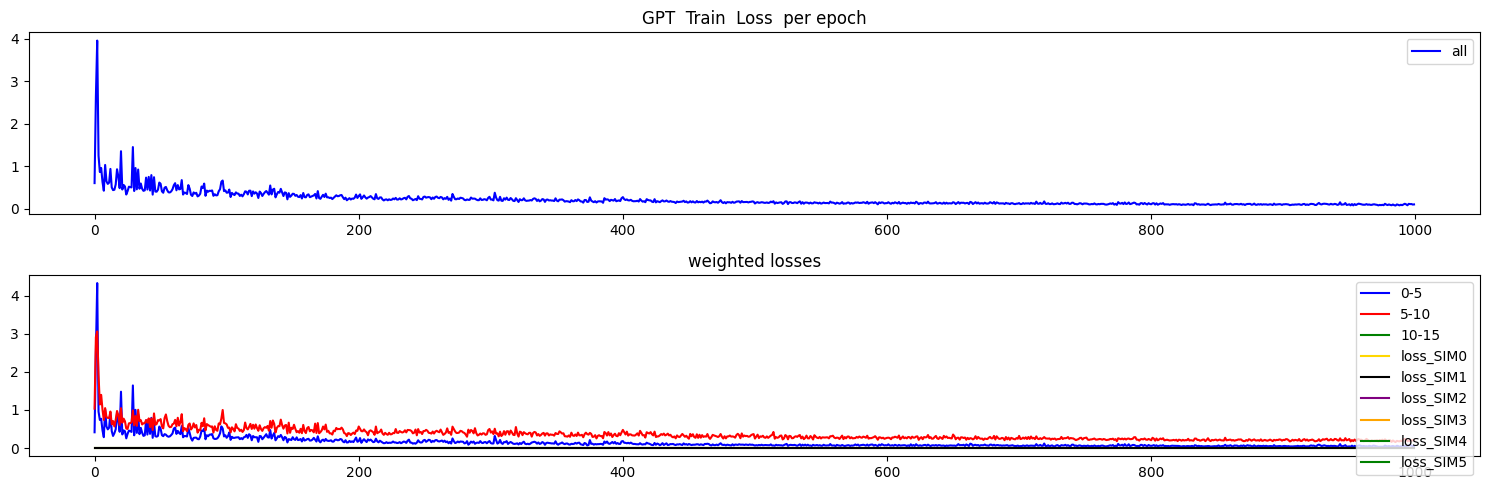

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


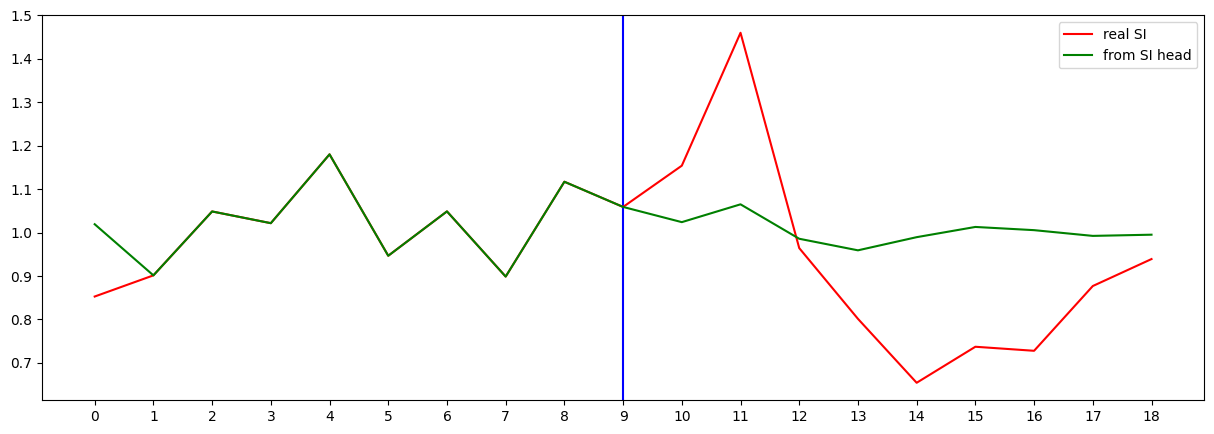

Testing R**2 - (all) - (no inputs):  0.9971545715526917
Testing R**2 - (f2) - SI full (no inputs):  0.00963684408363874
Testing R**2 - SI head only (no inputs):  -0.14370424190296038
0 ...index R**2 (no inputs):  -0.04724760674132411
1 ...index R**2 (no inputs):  -0.164173157038497
2 ...index R**2 (no inputs):  0.00963684408363874
3 ...index R**2 (no inputs):  -1.1373638897729705
4 ...index R**2 (no inputs):  -2.1223388793508473
5 ...index R**2 (no inputs):  -0.5536197440313315
6 ...index R**2 (no inputs):  -178.13086180081172
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7469845662884784
10 ...index R**2 (no inputs):  -1.0513717518897043
11 ...index R**2 (no inputs):  -0.3941762773609241
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.0820582044805287
16 ...index R**2 (no inputs):  -0.5977457273772289
17 ...index R**2 (no inputs):  -18.31693

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.807236
Loss_SI: 0.603782594203949 Loss_all: 1.2819616794586182
===
[200] Train Loss: 0.071070
Loss_SI: 0.03491411358118057 Loss_all: 0.15543344616889954
===
[400] Train Loss: 0.042352
Loss_SI: 0.01696956157684326 Loss_all: 0.1015767753124237
===
[600] Train Loss: 0.022843
Loss_SI: 0.012113438919186592 Loss_all: 0.04787958413362503
===
[800] Train Loss: 0.036688
Loss_SI: 0.017141884192824364 Loss_all: 0.08229567855596542
===


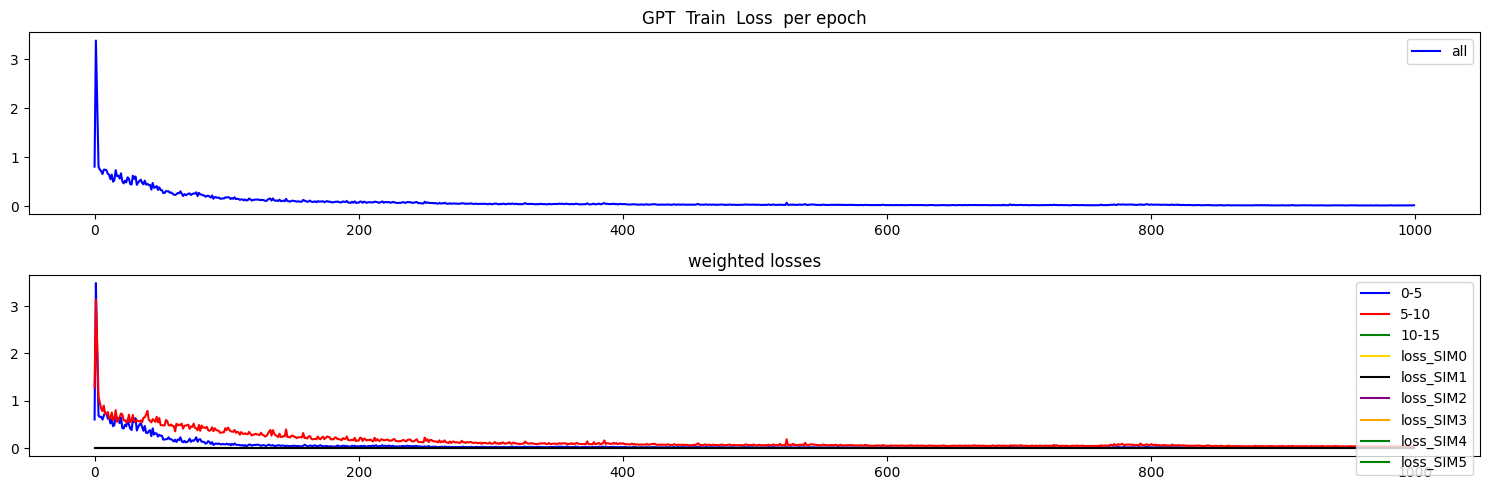

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


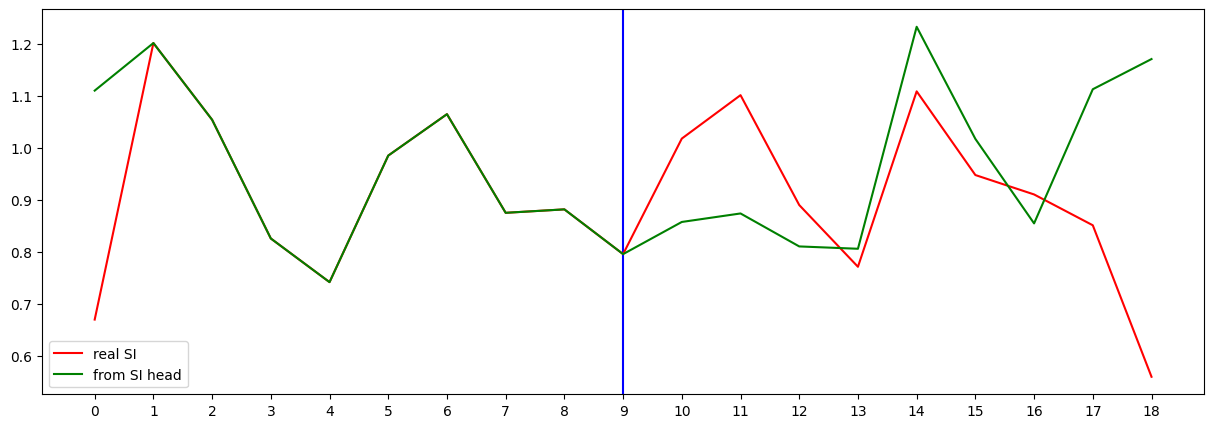

Testing R**2 - (all) - (no inputs):  0.9877086965417754
Testing R**2 - (f2) - SI full (no inputs):  -2.0760929766724616
Testing R**2 - SI head only (no inputs):  -2.02843275637789
0 ...index R**2 (no inputs):  -1.9107056545585586
1 ...index R**2 (no inputs):  -3.5962388589573244
2 ...index R**2 (no inputs):  -2.0760929766724616
3 ...index R**2 (no inputs):  -2.3509901200792167
4 ...index R**2 (no inputs):  -4.264427922217809
5 ...index R**2 (no inputs):  -0.3136213233263294
6 ...index R**2 (no inputs):  -0.07557996936674582
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4888723326099491
10 ...index R**2 (no inputs):  -2.0680846530079178
11 ...index R**2 (no inputs):  -11.94116679945371
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5237937880087091
16 ...index R**2 (no inputs):  -0.3580015664050684
17 ...index R**2 (no inputs):  -21.697425695

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.937256
Loss_SI: 0.8183404803276062 Loss_all: 1.2147250175476074
===
[200] Train Loss: 0.189605
Loss_SI: 0.10785409808158875 Loss_all: 0.3803584575653076
===
[400] Train Loss: 0.081664
Loss_SI: 0.03411495313048363 Loss_all: 0.19261211156845093
===
[600] Train Loss: 0.055750
Loss_SI: 0.02864987403154373 Loss_all: 0.11898338049650192
===
[800] Train Loss: 0.051332
Loss_SI: 0.031195595860481262 Loss_all: 0.09831783920526505
===


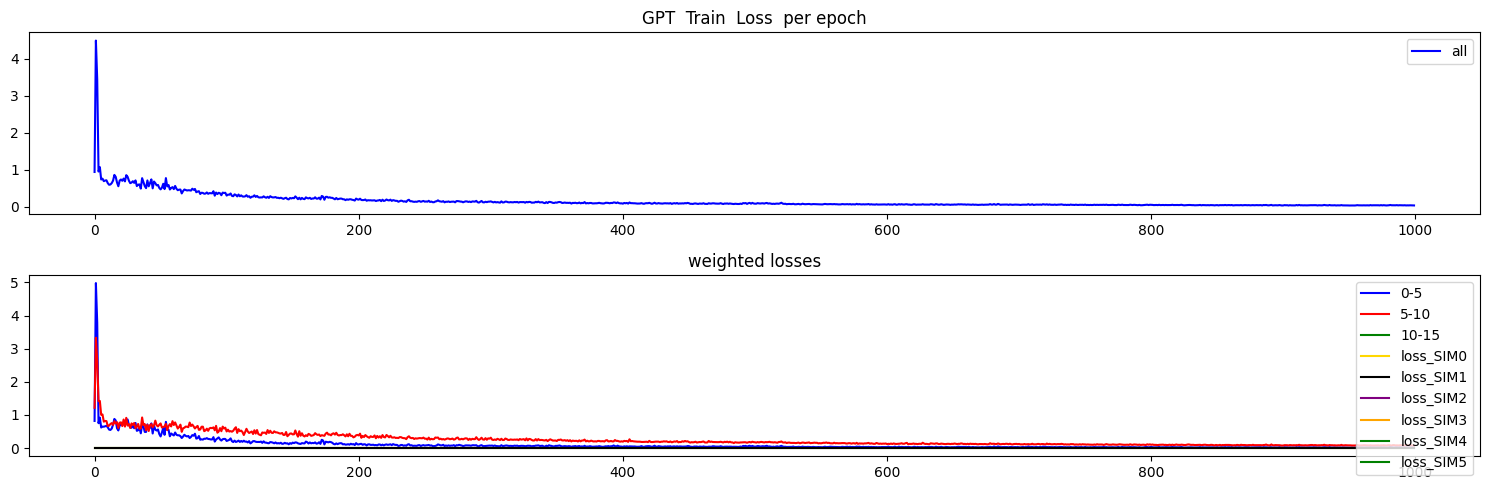

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


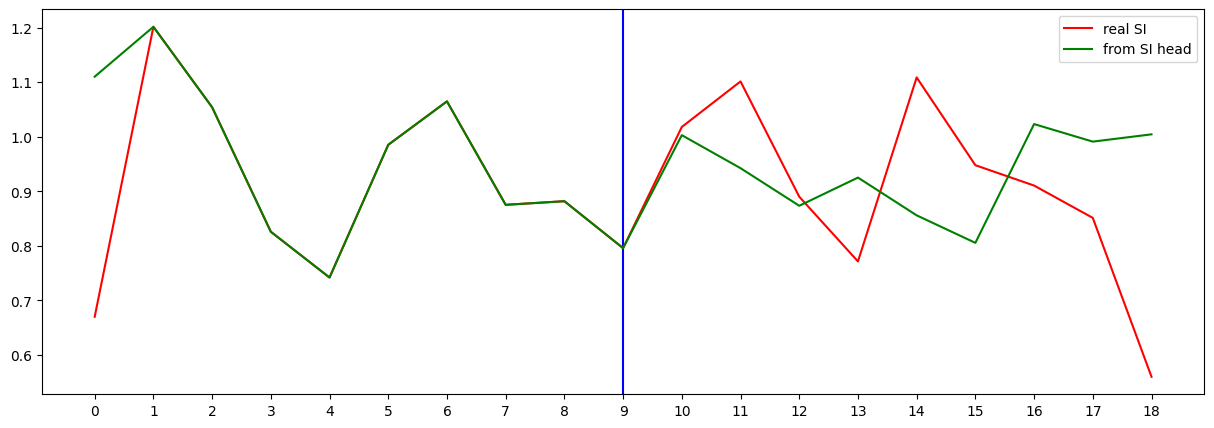

Testing R**2 - (all) - (no inputs):  0.9899099177832312
Testing R**2 - (f2) - SI full (no inputs):  -1.1387657319399764
Testing R**2 - SI head only (no inputs):  -0.523031688179113
0 ...index R**2 (no inputs):  -0.04190727767324387
1 ...index R**2 (no inputs):  -0.3498792577003089
2 ...index R**2 (no inputs):  -1.1387657319399764
3 ...index R**2 (no inputs):  -1.3767234426071693
4 ...index R**2 (no inputs):  -2.505787675317902
5 ...index R**2 (no inputs):  -0.0750983752410217
6 ...index R**2 (no inputs):  -0.3351552497128678
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4739926890002153
10 ...index R**2 (no inputs):  0.09018113514281156
11 ...index R**2 (no inputs):  -137.5381580969417
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.32899756059759144
16 ...index R**2 (no inputs):  -0.21530684756454144
17 ...index R**2 (no inputs):  -107.08242

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.799165
Loss_SI: 0.671960175037384 Loss_all: 1.0959773063659668
===
[200] Train Loss: 0.235846
Loss_SI: 0.15003681182861328 Loss_all: 0.4360674023628235
===
[400] Train Loss: 0.132957
Loss_SI: 0.07960356771945953 Loss_all: 0.25744858384132385
===
[600] Train Loss: 0.088503
Loss_SI: 0.043986208736896515 Loss_all: 0.1923757940530777
===
[800] Train Loss: 0.081486
Loss_SI: 0.04370710626244545 Loss_all: 0.16963794827461243
===


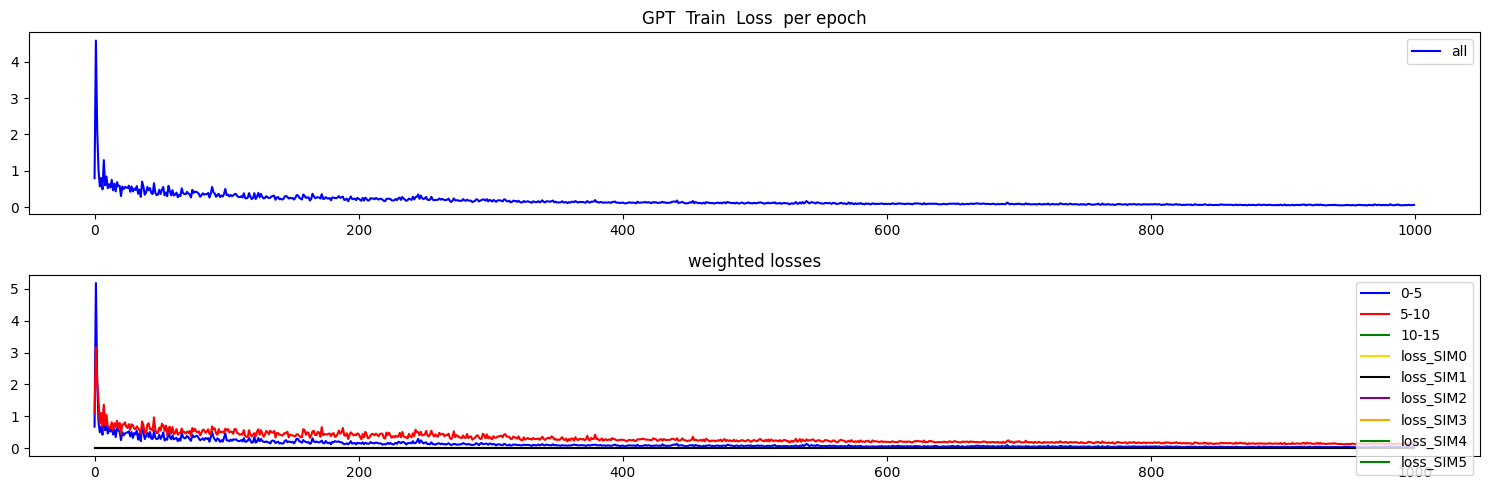

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


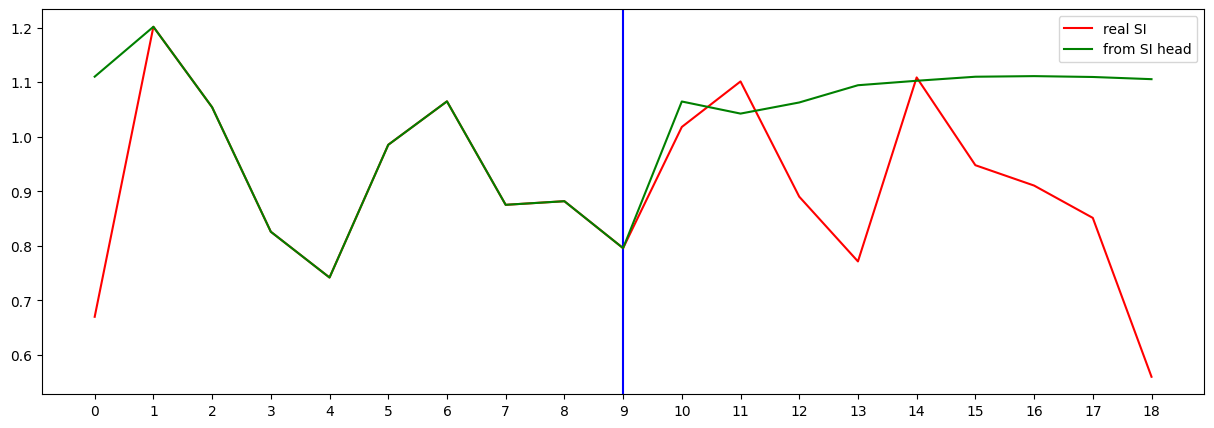

Testing R**2 - (all) - (no inputs):  0.989535410788779
Testing R**2 - (f2) - SI full (no inputs):  -2.6264907815986107
Testing R**2 - SI head only (no inputs):  -1.7670561802805973
0 ...index R**2 (no inputs):  -0.06691887911599737
1 ...index R**2 (no inputs):  -2.486112589766539
2 ...index R**2 (no inputs):  -2.6264907815986107
3 ...index R**2 (no inputs):  -0.768313663793851
4 ...index R**2 (no inputs):  -0.2885654984787618
5 ...index R**2 (no inputs):  -0.11532758451046266
6 ...index R**2 (no inputs):  -1.0702604393512338
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.43142371021104675
10 ...index R**2 (no inputs):  -0.3279326353573253
11 ...index R**2 (no inputs):  -9.077485443316183
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8382702559262609
16 ...index R**2 (no inputs):  -0.3864117729497394
17 ...index R**2 (no inputs):  -11.5200533

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.617905
Loss_SI: 0.38796156644821167 Loss_all: 1.1544406414031982
===
[200] Train Loss: 0.244223
Loss_SI: 0.20940855145454407 Loss_all: 0.32545772194862366
===
[400] Train Loss: 0.160273
Loss_SI: 0.10567990690469742 Loss_all: 0.2876571714878082
===
[600] Train Loss: 0.173337
Loss_SI: 0.12527574598789215 Loss_all: 0.2854783535003662
===
[800] Train Loss: 0.108637
Loss_SI: 0.0692916288971901 Loss_all: 0.2004416286945343
===


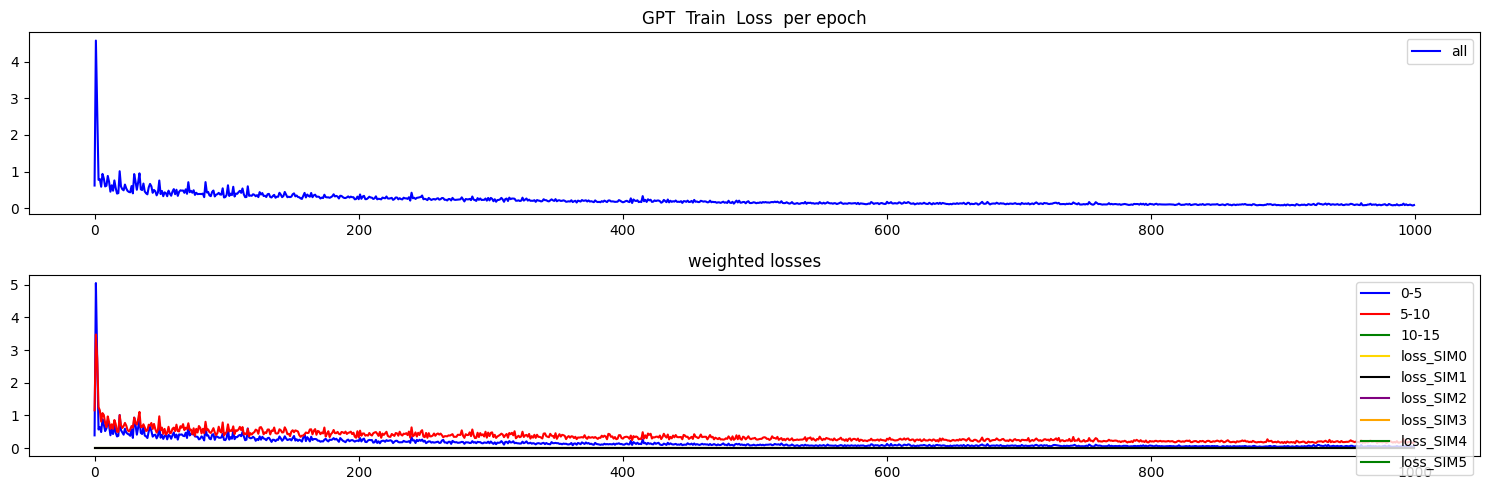

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(19,)
pred_si (1, 9, 1)
(9,)
(19,)
****
(19,)


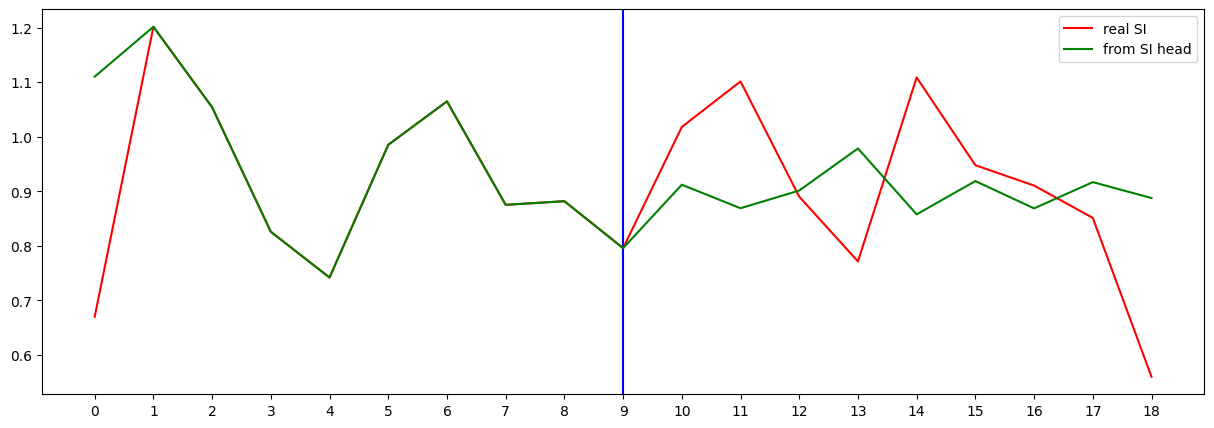

Testing R**2 - (all) - (no inputs):  0.9838549006436144
Testing R**2 - (f2) - SI full (no inputs):  0.16593553753293
Testing R**2 - SI head only (no inputs):  0.04326273816983539
0 ...index R**2 (no inputs):  0.009169758556591301
1 ...index R**2 (no inputs):  0.1750043943373435
2 ...index R**2 (no inputs):  0.16593553753293
3 ...index R**2 (no inputs):  -3.809614821727309
4 ...index R**2 (no inputs):  0.1487290123919437
5 ...index R**2 (no inputs):  -0.7253841130634919
6 ...index R**2 (no inputs):  0.08722764571792585
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.16390807855378609
10 ...index R**2 (no inputs):  -0.7793336150547916
11 ...index R**2 (no inputs):  -265.58916298432894
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.14491009981222547
16 ...index R**2 (no inputs):  -0.4722652842606767
17 ...index R**2 (no inputs):  -404.31605202390

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.6187319095495982


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -1.1020575564636474


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.41416969014799876


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.18498283060887277



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: -0.19870594087412918
2 .....R² on first n steps: 0.09066440276127186
3 .....R² on first n steps: 0.18326045729877172
4 .....R² on first n steps: 0.05568785748301819
5 .....R² on first n steps: -0.16353701251718733
6 .....R² on first n steps: -0.22361022077990733
7 .....R² on first n steps: -0.21277430032123057
8 .....R² on first n steps: -0.3830292459735758
9 .....R² on first n steps: -0.6187319095495982


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: 0.1527495614912453
2 .....R² on first n steps: 0.30399859549993447
3 .....R² on first n steps: 0.13909501953877623
4 .....R² on first n steps: -0.7328775912363368
5 .....R² on first n steps: -0.8681295932521282
6 .....R² on first n steps: -0.8566103243975425
7 .....R² on first n steps: -0.9411577655166987
8 .....R² on first n steps: -0.9738276615700663
9 .....R² on first n steps: -1.1020575564636474


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: 0.21958916946538243
2 .....R² on first n steps: 0.21295106733636116
3 .....R² on first n steps: 0.1073531132413823
4 .....R² on first n steps: 0.08036209810618322
5 .....R² on first n steps: 0.08517602326613771
6 .....R² on first n steps: 0.01288737423614239
7 .....R² on first n steps: -0.06355498612834531
8 .....R² on first n steps: -0.24433491077172387
9 .....R² on first n steps: -0.41416969014799876


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.026183647108308783
2 .....R² on first n steps: 0.2519819377864343
3 .....R² on first n steps: 0.11714183965412517
4 .....R² on first n steps: 0.10502608544542902
5 .....R² on first n steps: 0.1551881091171311
6 .....R² on first n steps: 0.04101687205553317
7 .....R² on first n steps: -0.04276499833581515
8 .....R² on first n steps: -0.12649005539098468
9 .....R² on first n steps: -0.18498283060887277



## Plot


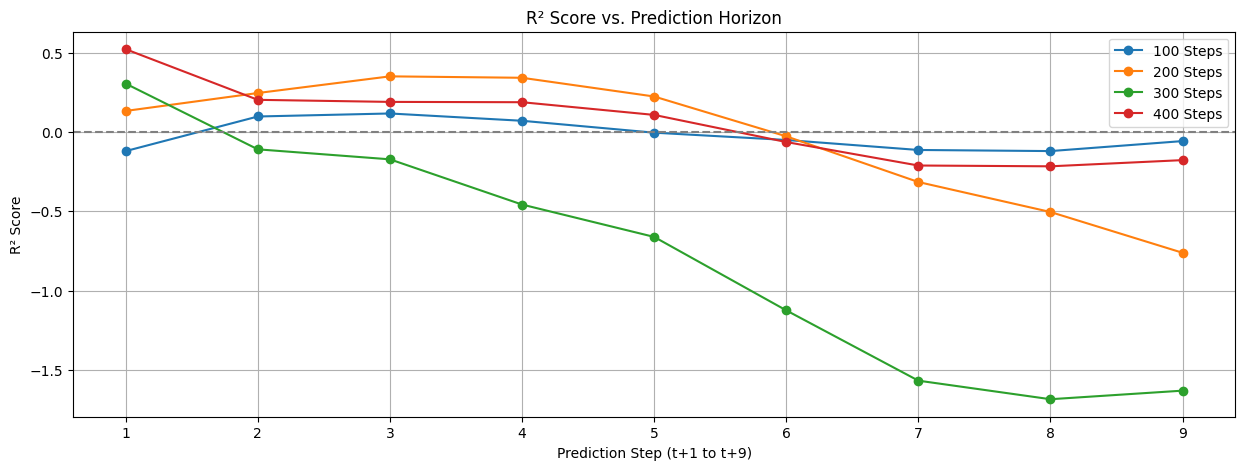

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
